# NASA BEARING DATASET 

### INTRO:

`Data` from Prognostics Data Repository hosted by NASA (the Center of Intelligent MaintenancE Systems (IMS), of University of Cincinnati)

`Format` Dataset in text format and has been rar-ed, then zipped

`File Format` ASCII

`Reference paper` Hai Qiu, Jay Lee, Jing Lin. “Wavelet Filter-based Weak Signature Detection Method and its Application on Roller Bearing Prognostics.” Journal of Sound and Vibration 289 (2006) 1066-1090.

### UNDERSTANDING DATA: 

*Data gathered from a run-to-failure experiment involving 4 bearings on a loaded shaft (6000 lbs), rotating at a constant speed of 2000 rpm for 20 kHz sampling rate (meaning 20,480 data points in 1 second)*

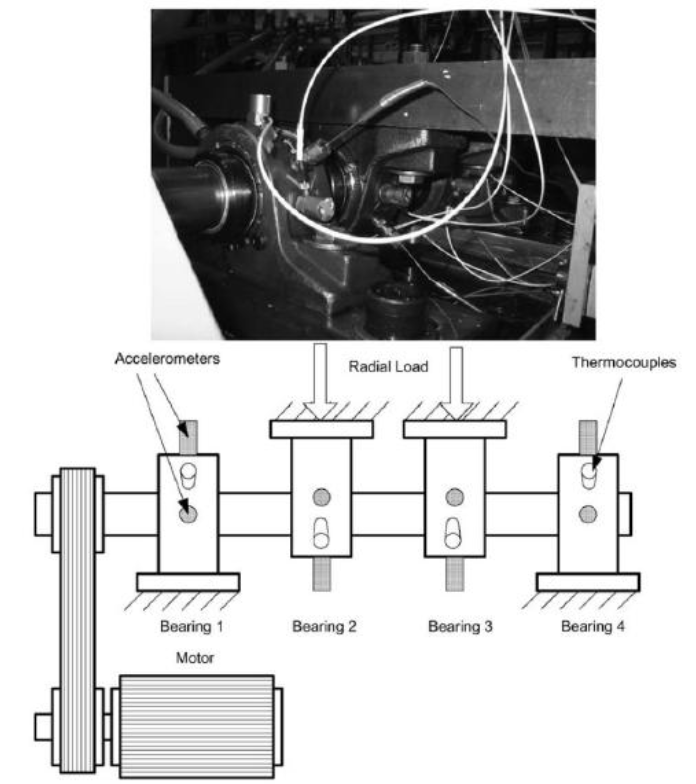

**NASA bearing Dataset**
     -> **Dataset1/Dataset2/Dataset1**
         -> Each **File** has **20,480 datapoints per second** (sampling rate of 20 kHz) recorded at **5/10 min interval** for **4 bearings** either in **1/2 dimensions**
         
         
- Dataset 1: From 2 high precision multi channel accelerometers (thus 8 channels, 2 channels per bearing)
            
            -- DURATION: October 22, 2003 12:06:24 to November 25, 2003 23:39:56
            -- FILE RECORDING INTEVAL: Every 10 minutes (except the first 43 files were taken every 5 minutes)
            -- DEFECT DESCRIPTION: @ the end of test-to-failure experiment, inner race defect occurred (bearing 3) & roller element defect (bearing 4)


- Dataset 2: From 1 multi channel accelerometer (4 channels, 1 channel per bearing)
            
            -- DURATION: February 12, 2004 10:32:39 to February 19, 2004 06:22:39
            -- FILE RECORDING INTEVAL: Every 10 minutes
            -- DEFECT DESCRIPTION: @ the end of test-to-failure experiment, outer race failure occurred (bearing 1)
            
            
- Dataset 3: From 1 multi channel accelerometer (4 channels, 1 channel per bearing)
        
            -- DURATION: March 4, 2004 09:27:46 to April 4, 2004 19:01:57
            -- FILE RECORDING INTEVAL: Every 10 minutes
            -- DEFECT DESCRIPTION: @ the end of test-to-failure experiment, outer race failure occurred (bearing 3)


In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mb 
import matplotlib.pyplot as plt 
import os

In [2]:
os.getcwd()

'C:\\Users\\rsh\\Desktop\\L&T NxT- Files'

In [3]:
os.chdir(r"C:\Users\rsh\Desktop\L&T NxT- Files\Dataset- PdM- Practice\Datsets")

In [4]:
smpl_df_of_one_sec=pd.read_csv("2003.10.22.13.19.13.csv", header=None, sep='\t')

In [5]:
smpl_df_of_one_sec.dropna(inplace = True) 
smpl_df_of_one_sec.columns=['B1x','B1y','B2x','B2y','B3x','B3y','B4x','B4y']

In [6]:
smpl_df_of_one_sec

B1x    B1y    B2x    B2y    B3x    B3y    B4x    B4y
0     -0.134 -0.042 -0.037 -0.054 -0.015 -0.044 -0.137 -0.137
1     -0.085 -0.078 -0.120 -0.144 -0.044 -0.105 -0.112 -0.051
2     -0.120 -0.042 -0.137 -0.203  0.022 -0.005 -0.059 -0.149
3     -0.159 -0.100 -0.173 -0.134 -0.159 -0.156 -0.125 -0.105
4     -0.208 -0.112 -0.144 -0.181 -0.144 -0.195 -0.161 -0.012
...      ...    ...    ...    ...    ...    ...    ...    ...
20475  0.029 -0.159 -0.012  0.122 -0.127 -0.054 -0.115 -0.112
20476  0.034 -0.134  0.056  0.085 -0.251 -0.181 -0.112 -0.125
20477  0.010 -0.200  0.117  0.005 -0.024 -0.095 -0.132 -0.154
20478 -0.029 -0.125 -0.022  0.049  0.024 -0.122 -0.095 -0.078
20479 -0.078  0.027 -0.093  0.029 -0.105 -0.061 -0.056 -0.063

[20480 rows x 8 columns]

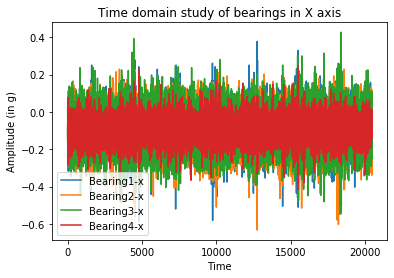

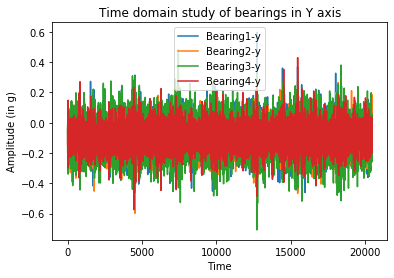

In [7]:
plt.plot(smpl_df_of_one_sec.index, smpl_df_of_one_sec.B1x, label = "Bearing1-x")
plt.plot(smpl_df_of_one_sec.index, smpl_df_of_one_sec.B2x, label = "Bearing2-x")
plt.plot(smpl_df_of_one_sec.index, smpl_df_of_one_sec.B3x, label = "Bearing3-x")
plt.plot(smpl_df_of_one_sec.index, smpl_df_of_one_sec.B4x, label = "Bearing4-x")

plt.ylabel('Amplitude (in g)')
plt.xlabel('Time')
plt.title('Time domain study of bearings in X axis')
plt.legend()
plt.show()

plt.plot(smpl_df_of_one_sec.index, smpl_df_of_one_sec.B1y, label = "Bearing1-y")
plt.plot(smpl_df_of_one_sec.index, smpl_df_of_one_sec.B2y, label = "Bearing2-y")
plt.plot(smpl_df_of_one_sec.index, smpl_df_of_one_sec.B3y, label = "Bearing3-y")
plt.plot(smpl_df_of_one_sec.index, smpl_df_of_one_sec.B4y, label = "Bearing4-y")

plt.ylabel('Amplitude (in g)')
plt.xlabel('Time')
plt.title('Time domain study of bearings in Y axis')
plt.legend()
plt.show()

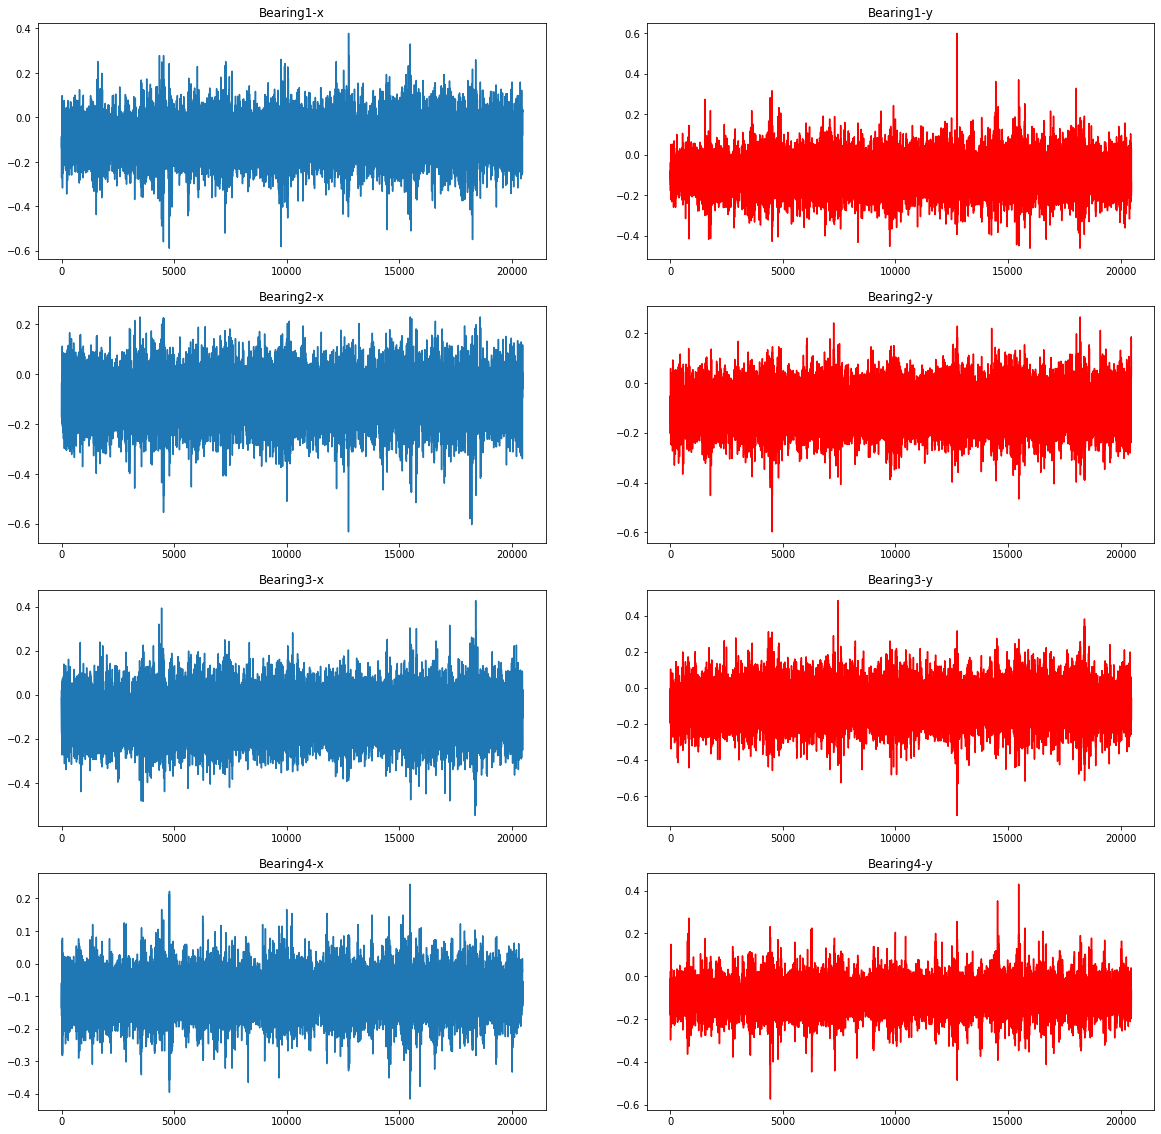

In [8]:
figure, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,20))

axes[0, 0].plot(smpl_df_of_one_sec.index, smpl_df_of_one_sec.B1x)
axes[0, 0].set_title("Bearing1-x")
axes[0, 1].plot(smpl_df_of_one_sec.index, smpl_df_of_one_sec.B1y, color="r")
axes[0, 1].set_title("Bearing1-y")
axes[1, 0].plot(smpl_df_of_one_sec.index, smpl_df_of_one_sec.B2x)
axes[1, 0].set_title("Bearing2-x")
axes[1, 1].plot(smpl_df_of_one_sec.index, smpl_df_of_one_sec.B2y, color="r")
axes[1, 1].set_title("Bearing2-y")
axes[2, 0].plot(smpl_df_of_one_sec.index, smpl_df_of_one_sec.B3x)
axes[2, 0].set_title("Bearing3-x")
axes[2, 1].plot(smpl_df_of_one_sec.index, smpl_df_of_one_sec.B3y, color="r")
axes[2, 1].set_title("Bearing3-y")
axes[3, 0].plot(smpl_df_of_one_sec.index, smpl_df_of_one_sec.B4x)
axes[3, 0].set_title("Bearing4-x")
axes[3, 1].plot(smpl_df_of_one_sec.index, smpl_df_of_one_sec.B4y, color="r")
axes[3, 1].set_title("Bearing4-y")

plt.show()
figure.tight_layout()

Post skimming through research papers on vibration analysis, I am experimenting with a few set of features (for rolling bearing ONLY, if journal bearing is present at client's end, then we'll have to do a deep-dive into faults and fault frequencies in journal bearings) from time, frequency and time-frequency domains. 

As direct expressions of the dynamic loads generated by moving parts, vibrations occupy a privileged position among the parameters to be considered when monitoring a machine. Vibration signal processing techniques make it possible to define a wide list of surveillance indicators that are more or less sensitive to the severity of a fault, to the identification of its source, and to its localization.

Surveillance indicators could be classified also under two major categories:
> Scalar indicators, which follow the evolution of a parameter linked to the amplitude of the vibration signal, in the time domain --> May be intrinsically insignificant at the moment. However, the evolution in time of this value indicates the level of aggravation of a defect. 
*6 most commonly used statistical scalar parameters for bearing diagnosis: Peak, RMS, Crest factor, Kurtosis, Impulse factor and Shape factor*
>> Defining a scalar indicator in the time domain requires choosing:
- A kinematics parameter representative of the vibratory movement (acceleration,
velocity, displacement) according to the frequency content of the vibratory signal
- A parameter representative of the signal amplitude (RMS value, Max-peak amplitude,
Crest factor, Kurtosis…)
- A bandwidth over which the retained parameter will be evaluated;
- A duration of analysis

> Spectral indicators that simultaneously follow the evolution in frequency and in
amplitude of each of its components.


# FEATURE ENGINEERING

## Time domain features

Shocks are usually created in the presence of faults and can be analyzed either in the **time domain** *(RMS and max-peak amplitude of vibration level, Crest factor and Kurtosis, detection of shock waves and Julien method, statistical parameters applied to the time signal, Cepstrum)*

### STATISTICAL

- 1) Mean/Absolute mean
- 2) RMS
- 3) Standard Deviation
- 4) Peak
- 5) Peak to Peak
- 6) Skewness
- 7) Kurtosis
- 8) Crest Factor
- 9) Impulse Factor
- 10) Shape Factor

### SPECIAL

- 11) TALAF
- 12) THIKAT

Reference papers: 

http://profs.etsmtl.ca/mthomas/Publications/Publications/A19-sassi.pdf

In [9]:
from numpy.fft import rfft, irfft, rfftfreq
from scipy import fftpack
import pandas as pd
import numpy as np 
import matplotlib as mb
import matplotlib.pyplot as plt 
import os

In [10]:
os.getcwd()

'C:\\Users\\rsh\\Desktop\\L&T NxT- Files\\Dataset- PdM- Practice\\Datsets'

In [11]:
os.chdir(r"C:\Users\rsh\Desktop\L&T NxT- Files\Dataset- PdM- Practice\Datsets")

In [12]:
s_data=pd.read_csv("2003.11.20.16.09.03.csv", header=None, sep='\t')
s_data.dropna(inplace = True) 
s_data.columns=['B1x','B1y','B2x','B2y','B3x','B3y','B4x','B4y']

In [13]:
s_data.head(10)

B1x    B1y    B2x    B2y    B3x    B3y    B4x    B4y
0 -0.010  0.012 -0.154 -0.217 -0.154 -0.239 -0.115  0.015
1 -0.056 -0.032 -0.156 -0.203 -0.242 -0.068 -0.222 -0.132
2 -0.181 -0.076 -0.083 -0.190  0.122  0.017 -0.117 -0.149
3 -0.183 -0.107 -0.085 -0.137  0.054 -0.178 -0.051 -0.103
4 -0.205 -0.083 -0.149 -0.154 -0.090 -0.149 -0.078 -0.107
5 -0.242 -0.068 -0.178 -0.076 -0.149 -0.071 -0.107 -0.098
6 -0.193 -0.173 -0.249 -0.127 -0.073 -0.161 -0.132 -0.029
7 -0.151 -0.181 -0.159 -0.054 -0.005 -0.208 -0.115 -0.112
8 -0.144 -0.095 -0.171 -0.081 -0.161 -0.081 -0.071 -0.105
9 -0.190 -0.149 -0.100 -0.049 -0.151 -0.107 -0.054 -0.020

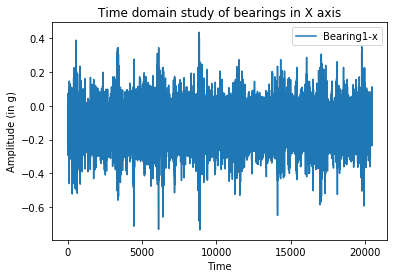

In [14]:
y=s_data.B1x
plt.plot(s_data.index, y, label = "Bearing1-x")
plt.ylabel('Amplitude (in g)')
plt.xlabel('Time')
plt.title('Time domain study of bearings in X axis')
plt.legend()
plt.show()

### 1) ABS MEAN: 
Just a means to aggregate

In [15]:
print("Abs mean value is", s_data.B1x.abs().mean())
abs_mean=s_data.B1x.abs().mean()
print("Mean value is", s_data.B1x.mean())
mean=s_data.B1x.mean()

Abs mean value is 0.12946333007812513
Mean value is -0.11708959960937446


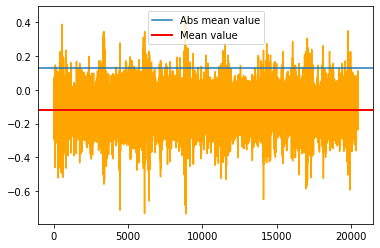

In [16]:
plt.plot (s_data.index,s_data.B1x, color="orange")
plt.axhline(y=abs_mean, label='Abs mean value')
plt.axhline(y=mean, label='Mean value', linewidth=2, color='r')
plt.legend()
plt.show()

### 2) RMS: 
It represents the mean energy of the vibratory signal. RMS value can be used in this case as a method to aggregate. 

In [17]:
N=s_data.B1x.count()
for i in np.abs(s_data.B1x):
    s=0
    s=s+(i**2)
    ms=0
    ms=[(s)/N]
print("RMS value is", np.sqrt(ms))
rms=np.sqrt(ms)

RMS value is [0.00127875]


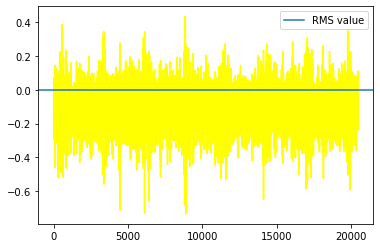

In [18]:
plt.plot (s_data.index,s_data.B1x, color="yellow")
plt.axhline(y=rms, label='RMS value')
plt.legend()
plt.show()

### 3) Standard Deviation:

It's a statistical measure in time domain. 

In [19]:
import statistics as stat

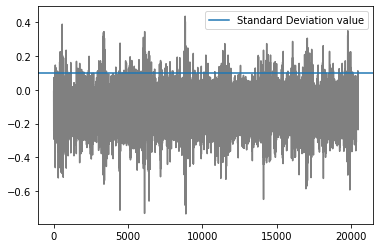

In [20]:
stdev=stat.stdev(s_data.B1x)
plt.plot (s_data.index,s_data.B1x, color="grey")
plt.axhline(y=stdev, label='Standard Deviation value')
plt.legend()
plt.show()

### 4) Peak: 
RMS indicator does not allow the early detection of degradation because the overall level measurements do not change significantly unless a problem becomes severe. 

As an alternative to RMS, the peak level of the signal can be used. A baseline "peak" level is defined for a new machine, and any variations from this norm would be indicative of a change in machine condition. It represents the effect of impacts in the signal. Very often, the max-peak signal is used to detect accidents. 

In [21]:
print("Peak value is", s_data.B1x.abs().max())
peak=s_data.B1x.abs().max()

Peak value is 0.735


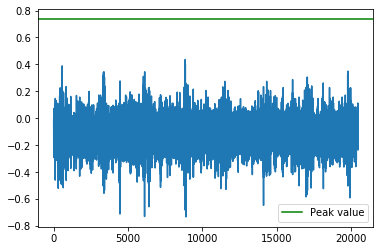

In [22]:
plt.plot (s_data.index,s_data.B1x)
plt.axhline(y=peak, label='Peak value', color='g')
plt.legend()
plt.show()

### 5) Peak to Peak: 
Peak to Peak is similar to Peak in terms of traits.

In [23]:
min=s_data.B1x.min()
max=s_data.B1x.max()
p2p=max-min
print("Peak value is", p2p)

Peak value is 1.17


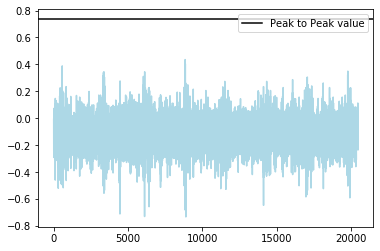

In [24]:
plt.plot (s_data.index,s_data.B1x, color='lightblue')
plt.axhline(y=peak, label='Peak to Peak value', color='black')
plt.legend()
plt.show()

### 6) Skewness: 
Skewness quantifies the asymmetry behavior of vibration signal through its probability density function (PDF). Skewness is used to measure whether the signal is negatively or positively skewed, while kurtosis measures the peak value of the PDF and indicates if the signal is impulse in nature. For a signal with a normal distribution i.e., normal bearing signal has a skewness value of zero.
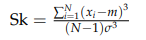

In [25]:
import statistics as stat
stdev=float(stat.stdev(s_data.B1x))
s3=(stdev**3)
No=(s_data.B1x.count()-1)
for i in s_data.B1x:
    j=0
    j=(i-s_data.B1x.mean())**3
    sk=((j/s3)*(1/No))
print("Skewness is", sk)

Skewness is -1.3355346206525118e-05


In [26]:
from scipy.stats import skew 
print( 'Skewness for data : ', skew(s_data.B1x)) 

Skewness for data :  -0.060776306685016185


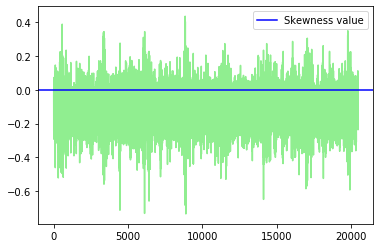

In [27]:
plt.plot (s_data.index,s_data.B1x,color='lightgreen')
plt.axhline(y=sk, label='Skewness value', color='blue')
plt.legend()
plt.show()

### 7) Kurtosis: 
The Kurtosis technique is used to indicate the "peakedness" of the signal; thus it measures the peak value of the PDF and indicates if the signal is impulse in nature. Kurtosis is obtained from the peak of the PDF of the vibration signal, while skewness is obtained from the mean value of the PDF of the vibration signal. 

A harmonic signal gives a Kurtosis of about 1.5 while a random signal gives a value of about 3. Impulsive signals will yield
values above 4. 
Kurtosis value of vibration signal from normal bearing is approximately three and the skewness value of approximately zero. Then, when the PDF of vibration signal changes due to faults, the kurtosis value will increase to greater than three and the skewness value will shift to either negative or positive.

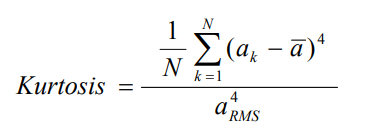

In [28]:
No=(s_data.B1x.count()-1)
for i in s_data.B1x:
    j=0
    j=(i-s_data.B1x.mean())**4
    ku=((j)*(1/No))*(1/rms)
print("Kurtosis value is", ku)

Kurtosis value is [7.20644274e-07]


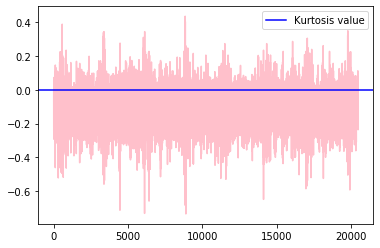

In [29]:
plt.plot (s_data.index,s_data.B1x,color='pink')
plt.axhline(y=ku, label='Kurtosis value', color='blue')
plt.legend()
plt.show()

### 8) Crest Factor: 
The Crest factor is the ratio of the peak level to the RMS level of the vibration signal.

Monitoring the CF of acceleration time waveforms is simple; it doesn't require elaborate signal processing, and its interpretation is relatively straightforward. CF & Ku are less dependent on the vibration level, but are sensitive to the spikiness of the vibration signals, and they can provide an early indication of significant changes in vibration signals.

For a healthy bearing, both the peak and the RMS values have weak amplitudes. Under normal operating conditions, most centrifugal machines generate acceleration waveforms at their bearing housings, which are either a sum of discrete frequency components or random, therefore having a crest factor below 4.

When a localized fault appears, a periodic shock also appears at the frequency of the bearing fault (BPFO and/or BPFI and/or 2 x BSF, etc.). As the fault increases, the waveform becomes far more impulsive with higher peak levels, while the RMS
value is not affected in any significant way. Whenever a fault or excessive load is present, the crest factor generally increases above 4. 

Disadvantage: 
- The RMS level may become significantly high in bearings with multiple or spreading defects, resulting in a reduction in the Crest factor (and other descriptors). Background noise is also a problem because it increases the RMS level, and consequently decreases the Crest factor. 
- It is usually more sensitive to impacts and degradation than the Crest factor.

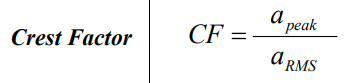

In [30]:
cf=peak/rms
print('CF value is', cf)

CF value is [574.77944077]


### 9) Impulse Factor: 

It is the ratio of peak amplitude to absolute mean amplitude. When the presence of the defects is
more pronounced, the Impulse factor becomes the most sensitive indicator

In [31]:
If=peak/abs_mean
print("Impulse Factor is", If)

Impulse Factor is 5.677283285981146


### 10) Shape Factor: 
It is the ratio of RMS amplitude to absolute mean amplitude. SF for its part always remains insensitive to damage spread. 
SF is affected by an object’s shape but is independent of its dimensions.

Disadv: SF appears as the least sensitive and cannot be used to detect a bearing defect.

In [32]:
sf=rms/abs_mean
print("Shape Factor is", sf)

Shape Factor is [0.00987732]


Special indicators like TALAF & THIKAT will have better interpretability only if we have defect data including ideal RMS amplitude values.

Reference Research Paper for Interpretation: “TALAF” AND “THIKAT” AS INNOVATIVE TIME DOMAIN INDICATORS FOR TRACKING BALL BEARINGS (SADOK SASSI, BECHIR BADRI and MARC THOMAS)

### 11) TALAF:
There is a need for development of new indicators because: 
- Ku, CF and IF are three particularly well adapted indicators for detecting the appearance of initial flaking. However, after a certain stage, the evolutions of these indicators are decreasing monotonous functions of the deterioration, and if their trend is not monitored, it is difficult to use them as surveillance indicators without the monitoring of the RMS value. 

- RMS signal is a monotonous increasing function of the deterioration, but it is only slightly sensitive to the appearance of the first marks of deterioration. 

- Scalar indicators (like Ku, CF  IF) are unable to detect failures resulting from a large number of defects or widespread damage, or those that occur at high rotational speeds. They reveal fault propagation but do not predict when the fault will become excessive.

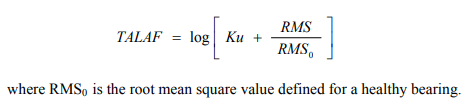

In [33]:
import math
def talaf(ku,rms,rms0):
    inside=(ku+(rms/rms0))
    return math.log(inside) #Natural log

In [34]:
talaf(ku, rms, 0.5)

-5.968442248309884

### 12) THIKAT:
Once a defective bearing is identified, data should be noted periodically; most managers become puzzled about the evolution of the damage and about the appropriate action to take:
- When should a machine be taken out of operation in the presence of deteriorating fault conditions, and could it remain reliable and secure until the next scheduled production stop?
- How long will the damaged bearing last, or should it be repaired immediately?

To answer these questions, another new parameter called THIKAT, has been designed to incorporate data from several parameters (Ku, RMS, CF, Peak) into a single unit of information.

THIKAT informs the decision-maker about degree of confidence in continuing to use any bearing which has already been diagnosed as defective, and enables the confirmation of the preliminary diagnosis carried out with TALAF.

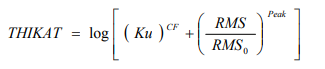

In [35]:
import math
def thikat(ku,cf,rms,rms0, peak):
    inside1=((ku)**cf)
    inside2=((rms/rms0)**peak)
    tot=inside1+inside2
    return math.log(tot) #Natural log

In [36]:
thikat(ku,cf,rms,0.005,peak)

-1.0022120423895102

Shocks are also created in the **frequency domain** *(spectral analysis around bearing defect frequencies, frequency spectrum in the high frequency domain, Spike energy, high frequency demodulation, acoustic emission, adaptive filtering, artificial neural networks, time-frequency,etc)*

(Denoising is yet to be performed)

### FFT- Signal analysis technique 

Fourier series have deep mathematical significance, for instance they are related to the eigenvectors of the input matrix. However they are mathematically complex. For the purposes of application the relevant thing to know is that by computing a Fourier trainsform and then inverting it, you may collect the "dominant" signal on a given frequency band. For larger frequency bands this will equate to smoothing out the function; for small frequency bands this will equate to singling out the noise in the function.

In [37]:
print("FFT output\n", np.fft.fft(s_data)) #Compute the one-dimensional discrete Fourier Transform.

FFT output
 [[-0.862     +0.j          0.48553258+0.02556497j  0.105     +0.025j
  ... -0.19753258+0.05243503j  0.105     -0.025j
   0.48553258-0.02556497j]
 [-1.111     +0.j          0.26166043-0.04125126j  0.08      -0.235j
  ...  0.11033957-0.09074874j  0.08      +0.235j
   0.26166043+0.04125126j]
 [-0.657     +0.j         -0.33976955+0.06075231j  0.141     -0.28j
  ... -0.26623045-0.12875231j  0.141     +0.28j
  -0.33976955-0.06075231j]
 ...
 [-0.878     +0.j          0.00372435-0.07032947j  0.053     -0.139j
  ...  0.11827565+0.17432947j  0.053     +0.139j
   0.00372435+0.07032947j]
 [-1.267     +0.j          0.11714928+0.23458579j -0.127     -0.124j
  ... -0.19114928+0.23741421j -0.127     +0.124j
   0.11714928-0.23458579j]
 [-1.379     +0.j          0.07840916+0.20914214j -0.041     -0.006j
  ... -0.12240916+0.18085786j -0.041     +0.006j
   0.07840916-0.20914214j]]


In [38]:
print("RFFT output\n", np.fft.rfft(s_data)) #Compute the one-dimensional discrete Fourier Transform for real input.

RFFT output
 [[-0.862     +0.j          0.48553258+0.02556497j  0.105     +0.025j
  -0.19753258-0.05243503j -0.004     +0.j        ]
 [-1.111     +0.j          0.26166043-0.04125126j  0.08      -0.235j
   0.11033957+0.09074874j -0.241     +0.j        ]
 [-0.657     +0.j         -0.33976955+0.06075231j  0.141     -0.28j
  -0.26623045+0.12875231j  0.139     +0.j        ]
 ...
 [-0.878     +0.j          0.00372435-0.07032947j  0.053     -0.139j
   0.11827565-0.17432947j -0.296     +0.j        ]
 [-1.267     +0.j          0.11714928+0.23458579j -0.127     -0.124j
  -0.19114928-0.23741421j -0.227     +0.j        ]
 [-1.379     +0.j          0.07840916+0.20914214j -0.041     -0.006j
  -0.12240916-0.18085786j  0.085     +0.j        ]]


### Low-pass Filter 

Notice that this method:

- Computes the FFT of the time-series.
- Samples it along the given frequencies.
- Thresholds it, removing all low-frequency Fourier series from the result.

Why Low Pass Filter? 

- Low pass filters are used to filter noise from a circuit and allow low frequencies to pass through. 'Noise' is a high frequency signal. When passed through a low pass filter most of the noise is removed and a clear sound is produced. Low pass filters are the most common filter type because of the popularity in removing alias signals, and for other aspects of data acquisition and signal conversion.

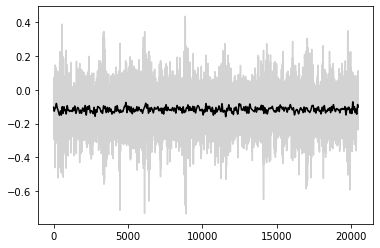

In [39]:
def low_pass(s, threshold=1e4):
    fourier = rfft(s)
    frequencies = rfftfreq(s.size, d=2e-2 / s.size)
    fourier[frequencies > threshold] = 0
    return irfft(fourier)

lf_signal_1 = low_pass(s_data.iloc[:, 0])
plt.plot(s_data.iloc[:, 0], color='lightgray')
plt.plot(lf_signal_1, color='black')

### High-pass filter
We can also go the other way and keep only the low-frequency Fourier series. 

Why High Pass filter?
- High pass filters allow high frequencies to pass through. High pass filters are normally used in early bearing wear detection. A high pass filter is useful to block the high amplitude, lower frequencies to enable to “amplify” to the low amplitude levels of early bearing wear in the higher frequencies.



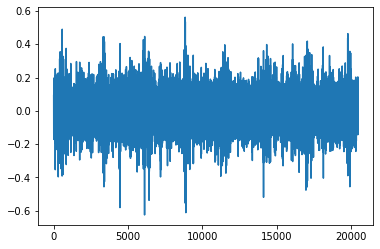

In [40]:
def high_pass(s, threshold=1e7):
    fourier = rfft(s)
    frequencies = rfftfreq(s.size, d=2e-2/s.size)
    fourier[frequencies < threshold] = 0
    return irfft(fourier)

hf_signal_1 = high_pass(s_data.iloc[:,0], threshold=1e4)

plt.plot(hf_signal_1)

If we sum these two signals we closely approximate the original dataset, to the degree that the difference doesn't appear on the plot:

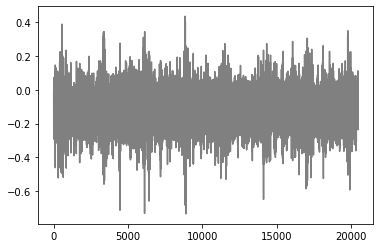

In [41]:
plt.plot(s_data.index,y, color='gray')

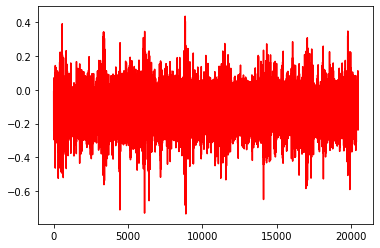

In [42]:
comb_data=lf_signal_1 + hf_signal_1
plt.plot(s_data.index,comb_data, color='red')

In [43]:
def decompose_into_n_signals(srs, n):
    fourier = rfft(srs)
    frequencies = rfftfreq(srs.size, d=2e-2/srs.size)
    out = []
    for vals in np.array_split(frequencies, n):
        ft_threshed = fourier.copy()
        ft_threshed[(vals.min() > frequencies)] = 0
        ft_threshed[(vals.max() < frequencies)] = 0        
        out.append(irfft(ft_threshed))
    return out

def plot_n_signals(sigs):
    fig, axarr = plt.subplots(len(sigs), figsize=(12, 12))
    for i, sig in enumerate(sigs):
        plt.sca(axarr[i])
        plt.plot(sig)
    plt.gcf().suptitle(f"Decomposition of signal into {len(sigs)} frequency bands", fontsize=24)
    

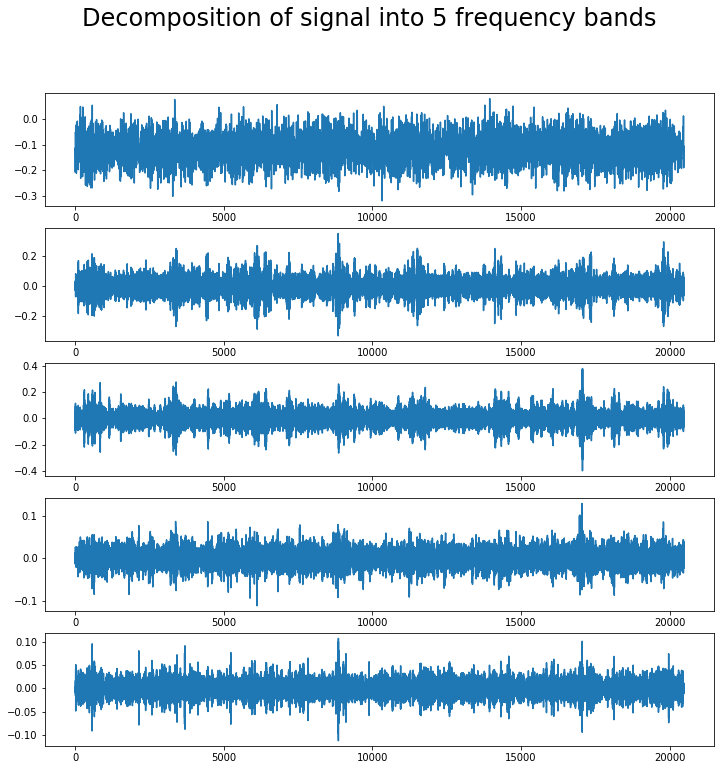

In [44]:
plot_n_signals(decompose_into_n_signals(comb_data, 5))

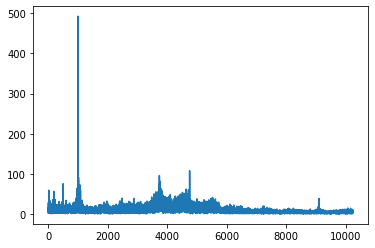

In [45]:
signal = np.squeeze(comb_data)

Y = np.fft.fftshift(np.abs(np.fft.fft(signal)))
Y = Y[int(len(Y)/2):]
Y = Y[10:]

plt.figure()
plt.plot(Y)

### Spectogram: 
- A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given vibration signals.

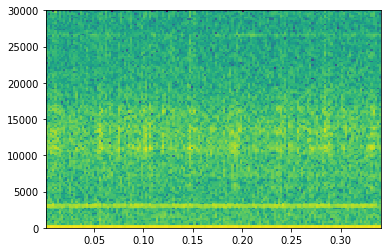

In [46]:
plt.figure()
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(signal, Fs= 60000)
plt.show()

### There are two types of features (mostly used in accoustics):

- The temporal features (time domain features), which are simple to extract and have easy physical interpretation, like: the energy of signal, zero crossing rate, maximum amplitude, minimum energy, etc.
- The spectral features (frequency based features), which are obtained by converting the time based signal into the frequency domain using the Fourier Transform, like: fundamental frequency, frequency components, spectral centroid, spectral flux, spectral density, spectral roll-off, etc. 

### Spectral Centroid

- It indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound. If the frequencies in the sound are same throughout then spectral centroid would be around a centre. If there are high frequencies at the end of sound then the centroid would be towards its end.

In [47]:
pip install "librosa"

Note: you may need to restart the kernel to use updated packages.


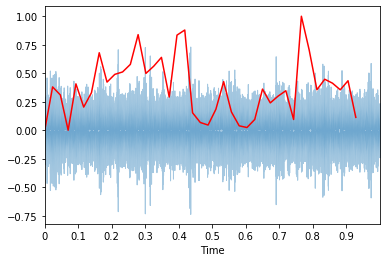

In [48]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import librosa.display
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(comb_data, sr=20480)[0]
spectral_centroids.shape

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(comb_data, 20480, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

- .spectral_centroid is used to calculate the spectral centroid for each frame. So it’ll return an array with columns equal to a number of frames present in your sample.
- .frames_to_time converts frame to time. time[i] == frame[i].
- We’re normalizing so that we can visualize data easily.

In [49]:
def spectral_centroid(x, sr): #sr= sample rate
    magnitudes = np.abs(np.fft.rfft(x)) # magnitudes of positive frequencies
    length = len(x)
    freqs = np.abs(np.fft.fftfreq(length, 1.0/sr)[:length//2+1]) # positive frequencies
    return np.sum(magnitudes*freqs) / np.sum(magnitudes) # return weighted mean

spectral_centroid(comb_data,20480)

4131.249936040144

### Spectral Rolloff
- Spectral rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.
- It's also capable of giving results for each frame.

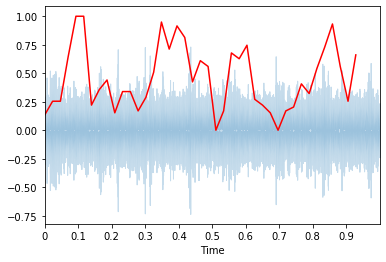

In [50]:
spectral_rolloff = librosa.feature.spectral_rolloff(comb_data, sr=20480)[0]
librosa.display.waveplot(comb_data, 20480, alpha=0.25)
plt.plot(t, normalize(spectral_rolloff), color='r')

- .spectral_rolloff is used to calculate rolloff for a given frame.

### Cepstrum Analysis: 

Now that we played a bit with spectrum, let's move on to Cepstrum. 

- What's Spectrum? 
> Native time waveform (time domain) is converted into Signals in frequency domain, known as spectrums using FFT.

> To reduce the amplitude difference, we take the log(magnitude of amplitude)--> Take Inv FT (FT of FT)--> We get Cepstrum.

- Why Cepstrum Analaysis?

Cepstrum analysis accurately identifies harmonics and sideband families and is a better technique available for fault diagnosis in gears, bearings, and turbine blades of ships and submarines. Cepstrum represents the global power content of a whole family of harmonics and sidebands when more than one family of sidebands are present at the same time. Also it i5 insensitive to the
transmission path effects since source and transmisgion path effects are additive and can be separated in cepstrum.

The cepstrum can be seen as information about the rate of change in the different spectrum bands. It was originally invented for characterizing the seismic echoes resulting from earthquakes and bomb explosions. It has also been used to determine the fundamental frequency of human speech and to analyze radar signal returns.

### MFCC (Mel Frequency Cepstral Coefficients)
- MFCCs of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope.
- The difference between the cepstrum and the mel-frequency cepstrum is that in the MFC, the frequency bands are equally spaced on the mel scale, which approximates the human auditory system's response more closely than the linearly-spaced frequency bands used in the normal cepstrum.

Take spectrum--> Mel scale filter bank--> Take log (magnitude) --> DCT--> MFCC feature

- **Why MFCC?**

MFCC takes into account human perception for sensitivity at appropriate frequencies by converting the conventional frequency to Mel Scale

In [51]:
pip install "python_speech_features"

Note: you may need to restart the kernel to use updated packages.


(20, 41)


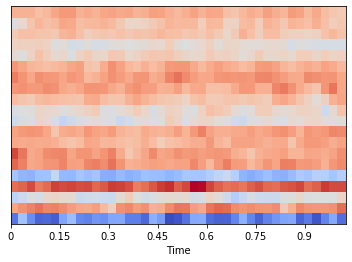

In [52]:
mfccs = librosa.feature.mfcc(comb_data, sr=20480)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=20480, x_axis='time')

- .mfcc is used to calculate mfccs of a signal.
- By printing the shape of mfccs you get how many mfccs are calculated on how many frames. The first value represents the number of mfccs calculated and another value represents a number of frames available.

In [53]:
from python_speech_features import mfcc
from python_speech_features import logfbank

In [54]:
# Extract MFCC and Filter bank features
mfcc_features = mfcc(comb_data, 20480)
filterbank_features = logfbank(comb_data, 20480)

# Printing parameters to see how many windows were generated
print('\nMFCC:\nNumber of windows =', mfcc_features.shape[0])
print('Length of each feature =', mfcc_features.shape[1])
print('\nFilter bank:\nNumber of windows =', filterbank_features.shape[0])
print('Length of each feature =', filterbank_features.shape[1])


MFCC:
Number of windows = 99
Length of each feature = 13

Filter bank:
Number of windows = 99
Length of each feature = 26


### Visualizing filter bank features

Text(0.5, 1.05, 'MFCC')

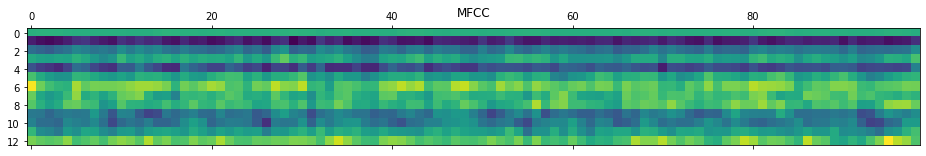

In [55]:
mfcc_features = mfcc_features.T
plt.matshow(mfcc_features)
plt.title('MFCC')

### POWER SPECTRAL DENSITY

In [58]:
import scipy

In [61]:
freqs, psd = scipy.signal.welch(sig)
#we define signal "sig"
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

NameError: name 'sig' is not defined

In [63]:
path=r"C:\Users\rsh\Desktop\L&T NxT- Files\Dataset- PdM- Practice\Datsets\NASA bearing data test\2nd_test"
os.listdir(path)

['2004.02.12.10.32.39',
 '2004.02.12.10.42.39',
 '2004.02.12.10.52.39',
 '2004.02.12.11.02.39',
 '2004.02.12.11.12.39',
 '2004.02.12.11.22.39',
 '2004.02.12.11.32.39',
 '2004.02.12.11.42.39',
 '2004.02.12.11.52.39',
 '2004.02.12.12.02.39',
 '2004.02.12.12.12.39',
 '2004.02.12.12.22.39',
 '2004.02.12.12.32.39',
 '2004.02.12.12.42.39',
 '2004.02.12.12.52.39',
 '2004.02.12.13.02.39',
 '2004.02.12.13.12.39',
 '2004.02.12.13.22.39',
 '2004.02.12.13.32.39',
 '2004.02.12.13.42.39',
 '2004.02.12.13.52.39',
 '2004.02.12.14.02.39',
 '2004.02.12.14.12.39',
 '2004.02.12.14.22.39',
 '2004.02.12.14.32.39',
 '2004.02.12.14.42.39',
 '2004.02.12.14.52.39',
 '2004.02.12.15.02.39',
 '2004.02.12.15.12.39',
 '2004.02.12.15.22.39',
 '2004.02.12.15.32.39',
 '2004.02.12.15.42.39',
 '2004.02.12.15.52.39',
 '2004.02.12.16.02.39',
 '2004.02.12.16.12.39',
 '2004.02.12.16.22.39',
 '2004.02.12.16.32.39',
 '2004.02.12.16.42.39',
 '2004.02.12.16.52.39',
 '2004.02.12.17.02.39',
 '2004.02.12.17.12.39',
 '2004.02.12.17.

In [64]:
os.chdir(r"C:\Users\rsh\Desktop\L&T NxT- Files\Dataset- PdM- Practice\Datsets\NASA bearing data test\2nd_test")

data_dir = r'C:\Users\rsh\Desktop\L&T NxT- Files\Dataset- PdM- Practice\Datsets\NASA bearing data test\2nd_test'
merged_data_absmean = pd.DataFrame()

# DATA ENGINEERING

## AGGREGATION

In [65]:
for filename in os.listdir(data_dir):
    # Create a for loop to load all the files in the specified directory and calculate for a specific file and keep it stored in an array; LOGIC: perform in file 1 --> Finish --> Go to next file
    
    dataset_test1=pd.read_csv(os.path.join(data_dir, filename), header=None, sep='\t')
    # Create a new dataset where all TSV files are read 
    
    dataset_test1_absmean = np.array(dataset_test1.abs().mean())
    # We reduce all the data from a single file of a second to a single array 

    dataset_test1_absmean = pd.DataFrame(dataset_test1_absmean.reshape(1,4))
    # we change from pd.array to pd.DataFrame
    
    dataset_test1_absmean.index = [filename]
    # we can specify index of df as a FILENAME
    
    merged_data_absmean = merged_data_absmean.append(dataset_test1_absmean)
    # append adds data to the original list at the end of the dataframe

In [66]:
merged_data_absmean.columns=["B1x","B2x","B3x","B4x"]

In [67]:
merged_data_absmean

B1x       B2x       B3x       B4x
2004.02.12.10.32.39  0.058332  0.071832  0.083244  0.043065
2004.02.12.10.42.39  0.058997  0.074008  0.084439  0.044540
2004.02.12.10.52.39  0.060239  0.074223  0.083922  0.044442
2004.02.12.11.02.39  0.061453  0.073843  0.084462  0.045081
2004.02.12.11.12.39  0.061361  0.075606  0.082837  0.045118
...                       ...       ...       ...       ...
2004.02.19.05.42.39  0.453318  0.161011  0.137444  0.119042
2004.02.19.05.52.39  0.337575  0.132397  0.144997  0.092123
2004.02.19.06.02.39  0.351094  0.152259  0.151296  0.100813
2004.02.19.06.12.39  0.001857  0.003731  0.003656  0.001786
2004.02.19.06.22.39  0.001168  0.000767  0.000716  0.001699

[984 rows x 4 columns]

In [68]:
merged_data_absmean.index = pd.to_datetime(merged_data_absmean.index, format='%Y.%m.%d.%H.%M.%S')
# Identify and convert index as datetime format
merged_data_absmean = merged_data_absmean.sort_index()
# Why to sort index?

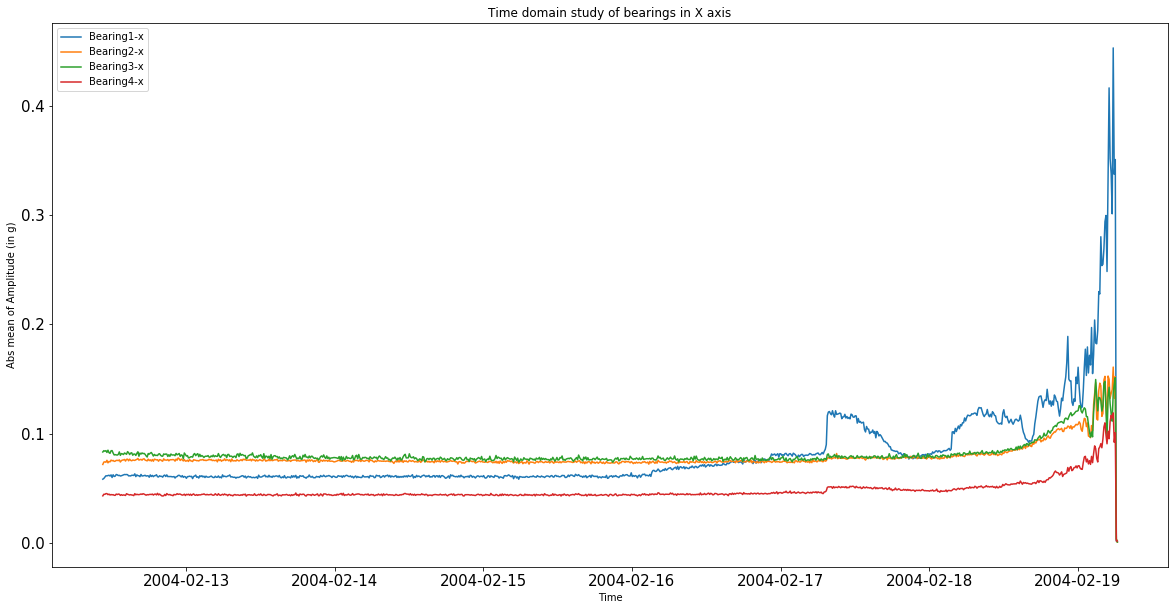

In [69]:
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.figure(figsize=(20,10))
plt.plot(merged_data_absmean.index, merged_data_absmean.B1x, label = "Bearing1-x")
plt.plot(merged_data_absmean.index, merged_data_absmean.B2x, label = "Bearing2-x")
plt.plot(merged_data_absmean.index, merged_data_absmean.B3x, label = "Bearing3-x")
plt.plot(merged_data_absmean.index, merged_data_absmean.B4x, label = "Bearing4-x")

plt.ylabel('Abs mean of Amplitude (in g)')
plt.xlabel('Time')
plt.title('Time domain study of bearings in X axis')
plt.legend()
plt.show()
figure.tight_layout()

### Considering only one bearing (B1) and x axis: 

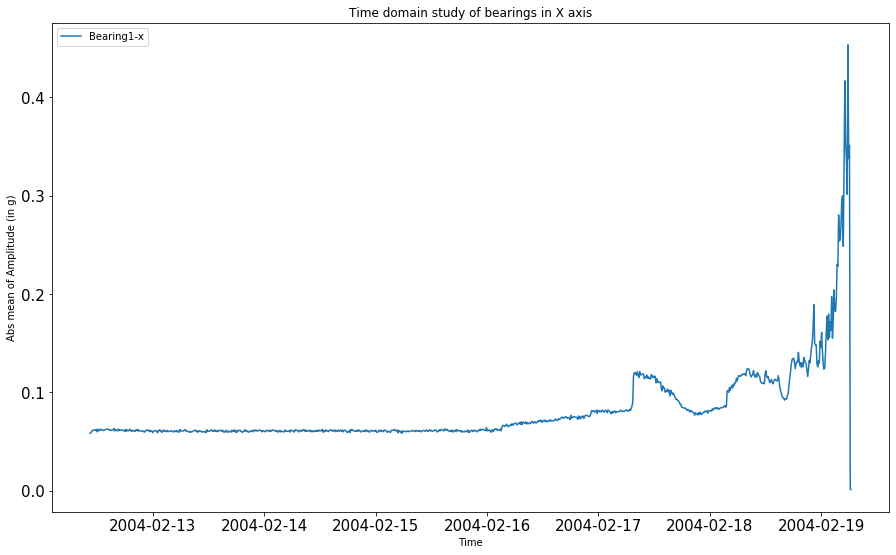

In [70]:
plt.figure(figsize=(15,9))
plt.plot(merged_data_absmean.index, merged_data_absmean.B1x, label = "Bearing1-x")
plt.ylabel('Abs mean of Amplitude (in g)')
plt.xlabel('Time')
plt.title('Time domain study of bearings in X axis')
plt.legend()
plt.show()
figure.tight_layout()

### Slicig data 

In [71]:
sliced_data = pd.DataFrame()

In [72]:
sliced_data=merged_data_absmean.B1x['2004-02-17':]
sliced_data

2004-02-17 00:02:39    0.081470
2004-02-17 00:12:39    0.080109
2004-02-17 00:22:39    0.080792
2004-02-17 00:32:39    0.080128
2004-02-17 00:42:39    0.081804
                         ...   
2004-02-19 05:42:39    0.453318
2004-02-19 05:52:39    0.337575
2004-02-19 06:02:39    0.351094
2004-02-19 06:12:39    0.001857
2004-02-19 06:22:39    0.001168
Name: B1x, Length: 327, dtype: float64

[Text(0, 0.5, 'ABS MEAN Vibration/Acceleration(g)'), Text(0.5, 0, 'Time')]

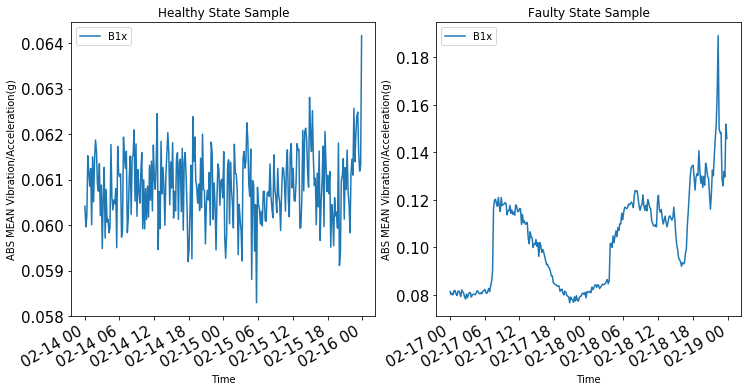

In [73]:
fig = plt.figure()
# Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(121)
# Divide the figure into a 1x2 grid, and give me the second section
ax2 = fig.add_subplot(122)

faulty = merged_data_absmean['2004-02-17':'2004-02-18']
faulty.B1x.plot(figsize = (12,6), title="Faulty State Sample" , legend = True, ax=ax2)
ax2.set(xlabel="Time", ylabel="ABS MEAN Vibration/Acceleration(g)")

healthy = merged_data_absmean['2004-02-14':'2004-02-15']
healthy['B1x'].plot(figsize = (12,6), title="Healthy State Sample" , legend = True, ax=ax1)
ax1.set(xlabel="Time", ylabel="ABS MEAN Vibration/Acceleration(g)")

In [74]:
merged_data_RMS=pd.DataFrame()

In [75]:
for filename in os.listdir(data_dir):
    dataset_test1=pd.read_csv(os.path.join(data_dir, filename), header=None, sep='\t')   
    dataset_test1_RMS = np.array(np.sqrt(dataset_test1.abs()**2).mean())
    dataset_test1_RMS = pd.DataFrame(dataset_test1_RMS.reshape(1,4))
    dataset_test1_RMS.index = [filename]
    merged_data_RMS = merged_data_RMS.append(dataset_test1_RMS)

In [76]:
merged_data_RMS.columns=["B1x","B2x","B3x","B4x"]

In [77]:
merged_data_RMS.head(10)

B1x       B2x       B3x       B4x
2004.02.12.10.32.39  0.058332  0.071832  0.083244  0.043065
2004.02.12.10.42.39  0.058997  0.074008  0.084439  0.044540
2004.02.12.10.52.39  0.060239  0.074223  0.083922  0.044442
2004.02.12.11.02.39  0.061453  0.073843  0.084462  0.045081
2004.02.12.11.12.39  0.061361  0.075606  0.082837  0.045118
2004.02.12.11.22.39  0.061669  0.073281  0.084886  0.044171
2004.02.12.11.32.39  0.061944  0.074592  0.082623  0.044658
2004.02.12.11.42.39  0.061231  0.074171  0.082021  0.043840
2004.02.12.11.52.39  0.062281  0.075808  0.084373  0.044273
2004.02.12.12.02.39  0.059893  0.075117  0.084504  0.043972

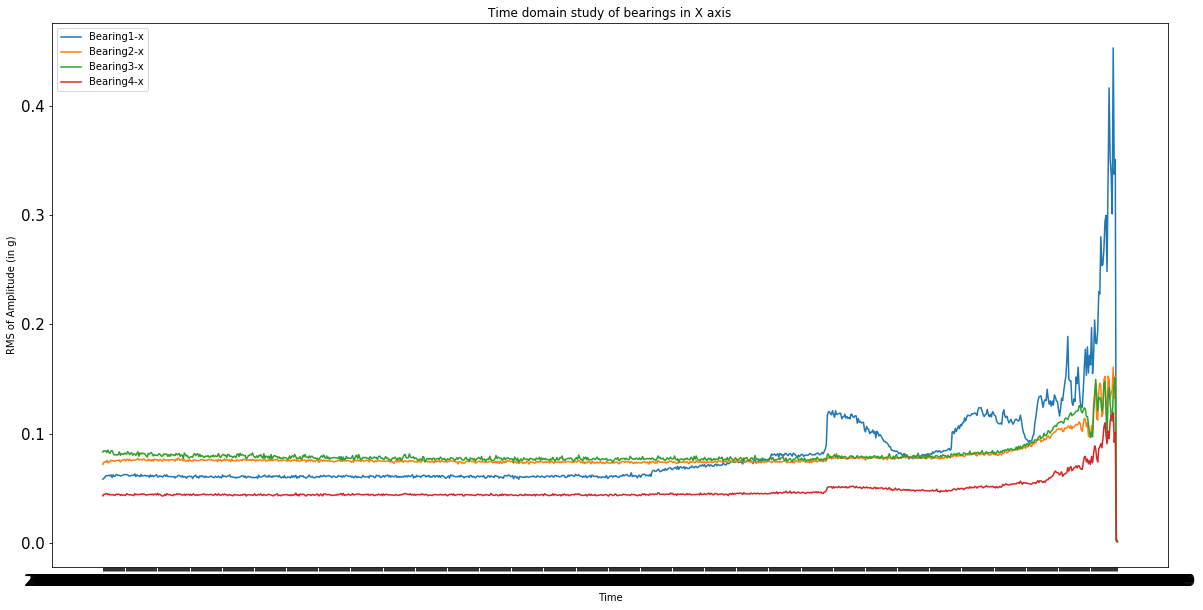

In [78]:
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.figure(figsize=(20,10))
plt.plot(merged_data_RMS.index, merged_data_RMS.B1x, label = "Bearing1-x")
plt.plot(merged_data_RMS.index, merged_data_RMS.B2x, label = "Bearing2-x")
plt.plot(merged_data_RMS.index, merged_data_RMS.B3x, label = "Bearing3-x")
plt.plot(merged_data_RMS.index, merged_data_RMS.B4x, label = "Bearing4-x")

plt.ylabel('RMS of Amplitude (in g)')
plt.xlabel('Time')
plt.title('Time domain study of bearings in X axis')
plt.legend()
plt.show()
figure.tight_layout()

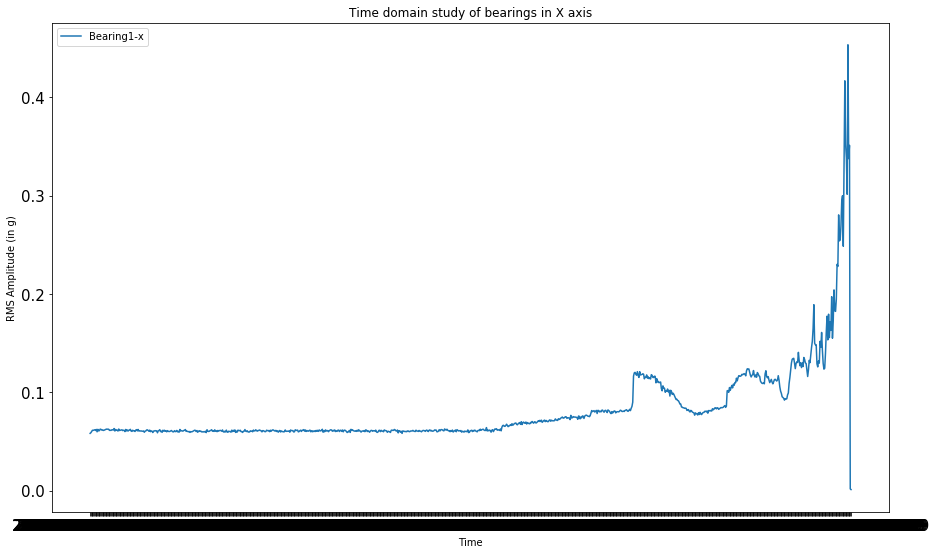

In [79]:
plt.figure(figsize=(15,9))
plt.plot(merged_data_RMS.index, merged_data_RMS.B1x, label = "Bearing1-x")
plt.ylabel('RMS Amplitude (in g)')
plt.xlabel('Time')
plt.title('Time domain study of bearings in X axis')
plt.legend()
plt.show()
figure.tight_layout()

## ORBIT PLOT

An Orbit is the two-dimensional depiction of the machine’s movement.

Let's consider a steam turbine (3600 RPM, capable of generating 214 MW, roughly weighed at 50 T).

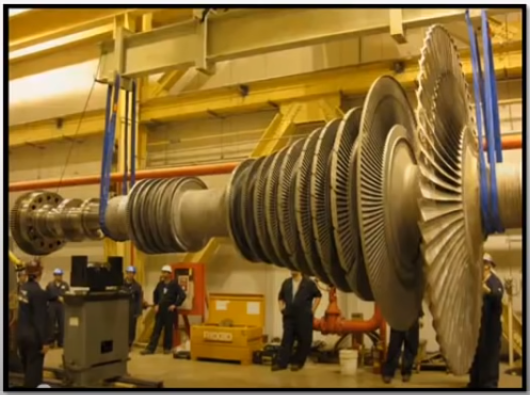


This is it's 3D model. 
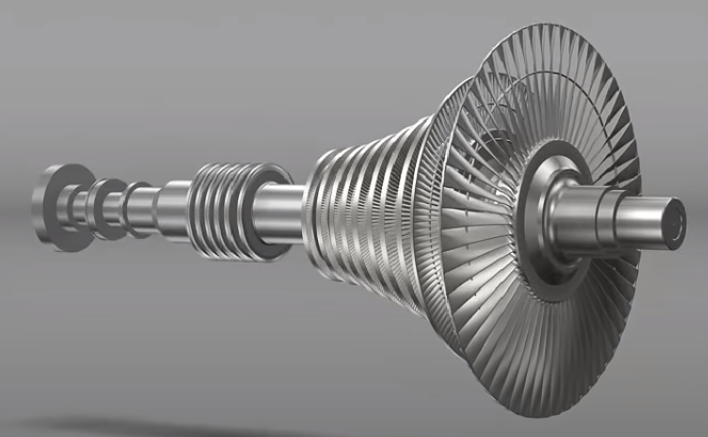

We're onto discovering the necessity of the Orbit plot!

Let's say, in this case, we are to study the movement of shaft with respect to the journal bearing, the trajectory taken by the center of shaft with respect to center of journal bearing may lead us to interesting studies concerning faults and failure modes. 

**Eg. Single bending moment**
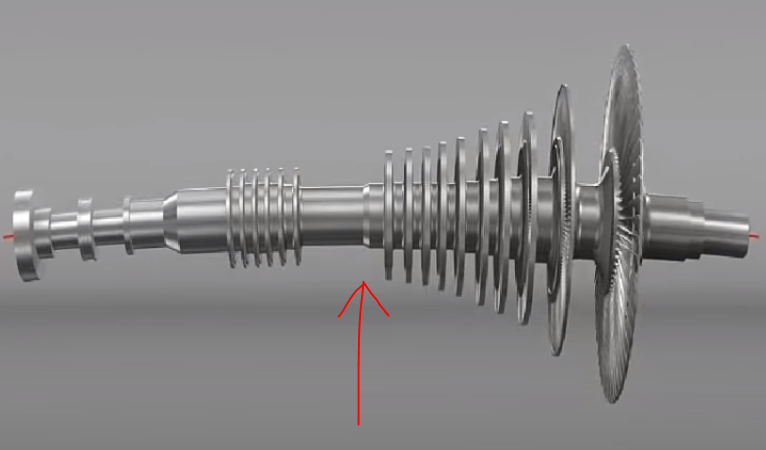

**Eg. Multiple bending moments**
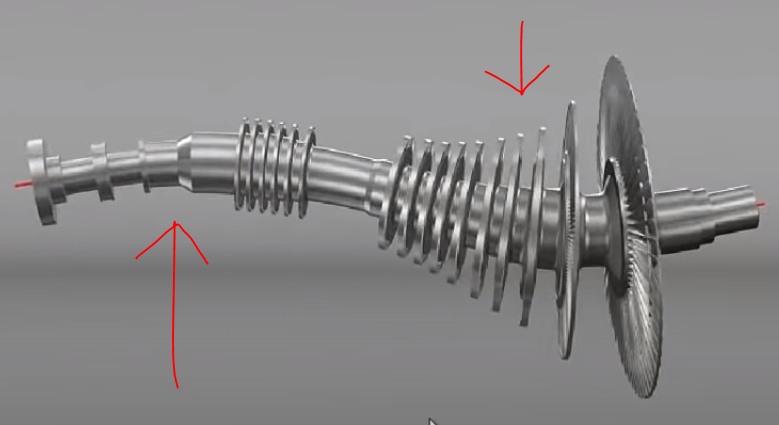

In cases like these, ORBIT PLOTS come very handy where we would like to explore faults in rotating elements (like SHAFTS)

**Eg. Orbit plots at several points of a steam turbine**

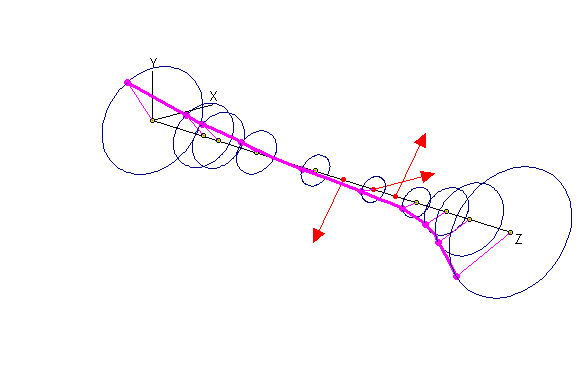


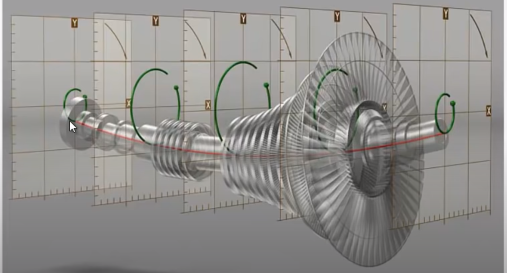

### CONSTRUCTION OF AN ORBIT CHART: 

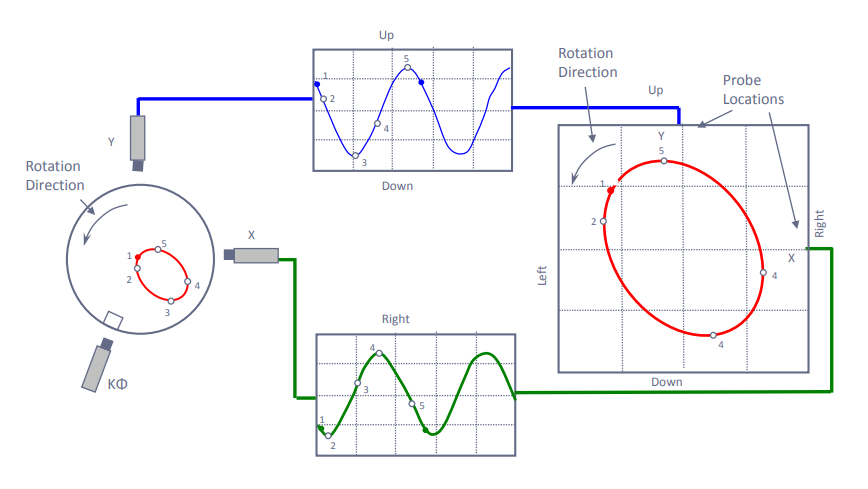



- Orbit Plots show the path a rotor takes as at vibrates during operation. 
- A well balanced shaft with no movement in any direction and would produce a dot in the middle of the plot. The shaft movement can give an indication of the vibration source e.g. if there is a lot of up/down movement it may be that the machine feet are not bolted down tightly enough.
- From the dual channel measurement of data from two orthogonal (perpendicular) proximity probes, accelerometers, etc) displacement or acceleration at horizontal and vertical axes are measured simultaneously.
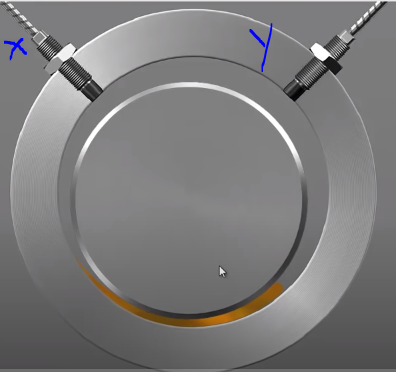
- The Orbit display uses a pair of measurements in the time domain.

## METHOD 1 to create Orbit plot: 

-> Orbit plots are essentially Lissajous figures or Lissajous curves are the curves in the x-y plane obtained by taking x and y to vary sinusoidally with respect to a parameter t, typically with different frequencies. 

-> So find the functions of X,Y axes and plot a Lissajous curve

-> X and Y sinusoids are symmetric (like a cosine and a sine wave), in a sense that when plotting the Y values versus the X
values (producing the orbits from the previous section) an elliptical plot is produced, describing the machine’s main movement. Therefore, comparing the X and the Y waveforms allows for a method of detecting problems in the machine.

-> Each of the axis generates its own signal which is sinusoidal. Therefore, what is being plotted are two functions versus each-other, where their values are in the form:

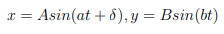

-> The appearance of the curves is highly senstive to the ratio a/b. When a = b, the resulting plot is an ellipse which is the normal case in vibrating machinery. As the ratio increases, curves (similar to the following ones) are generated, indicating mechanical faults in the machinery.

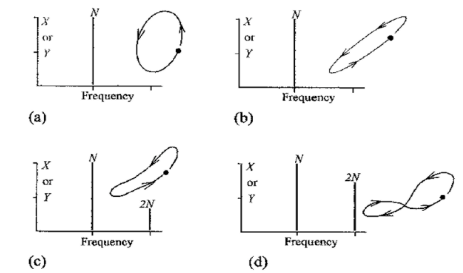

### If you plot two sine waves against each other, they can form a circle

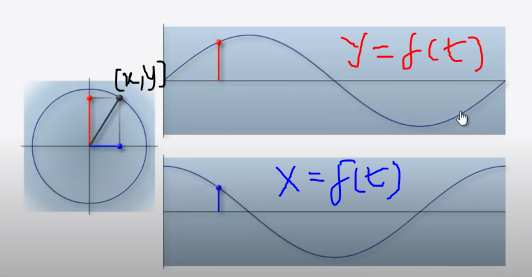

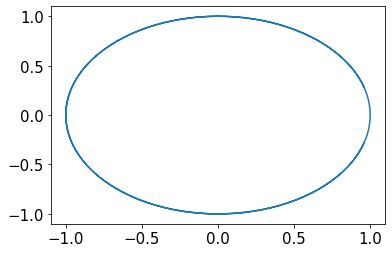

In [80]:
from numpy import sin,pi,linspace
from pylab import plot,show
a = 3 
delta = pi/2
t = linspace(-2,2,400)

x = sin(a * t + delta) # Substitute with whatever time domain equation we have on X axis 

b = 3 

y = sin(b * t) # Substitute with whatever time domain equation we have on Y axis 

plot(x,y)

show()

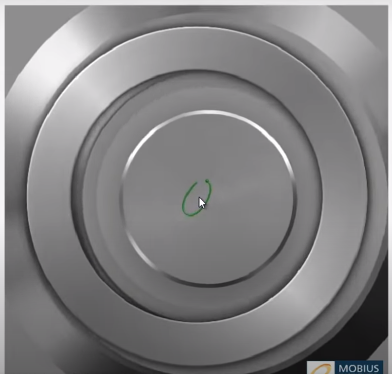

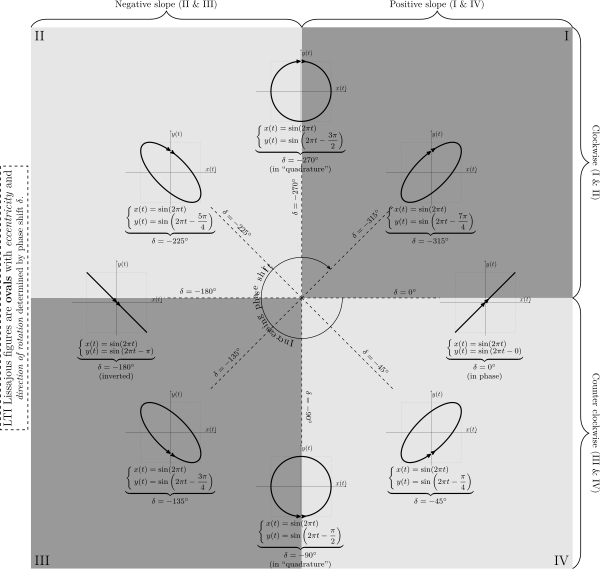

Although this is a way of working backwards to visualise the movement, the above equations can help us arriving at simple ellipses 

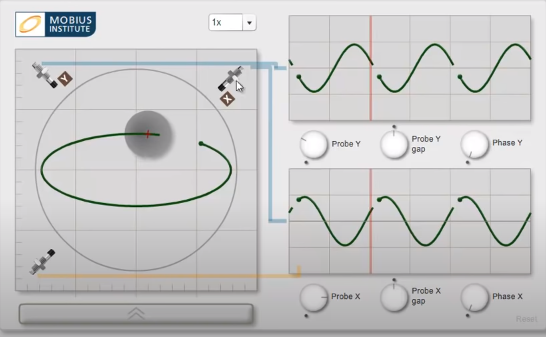

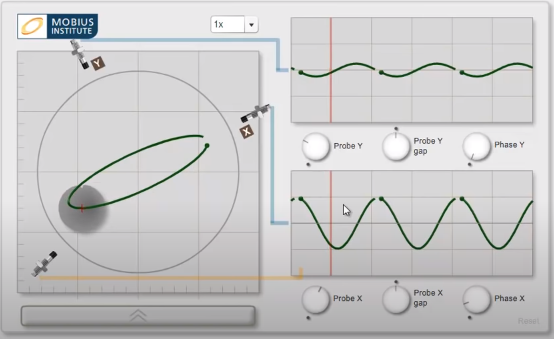

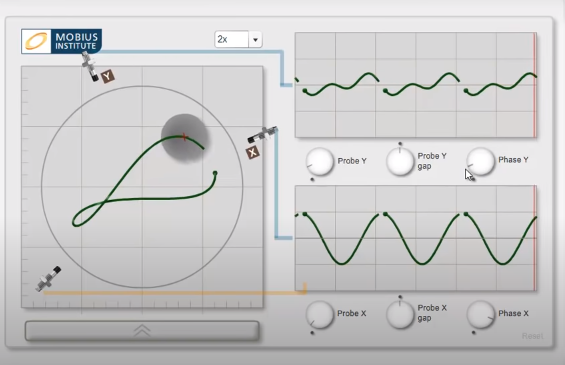

## METHOD 2 to create Orbit plot: 

Take datapoints from 2 time domain measurements directly as inputs and plot the Orbit graph. 

### General fault indicators: 

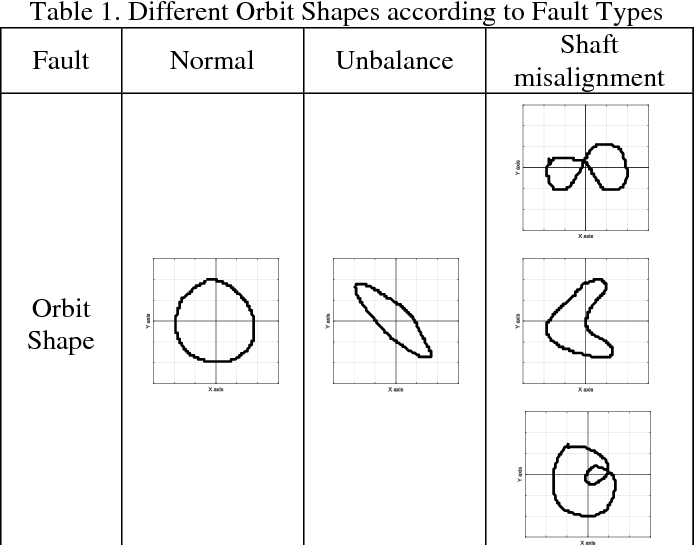


### Understanding Vibration Signatures:
Industrial rotating equipments cause forced vibration as a consequence of a spinning shaft applying a restorative force to to the surrounding system. The most common vibration frequency is directly caused by this spinning shaft is dubbed fundamental shaft speed or running speed and is denoted as "1X vibration" (which is typically caused by Unbalance). Unbalance occurs when the rotor has a heavy spot. 

Techically,when GEOMETRIC CENTRELINE OF ROTATION does NOT coincide with MASS CENTRELINE, it is called STATIC UNBALANCE.

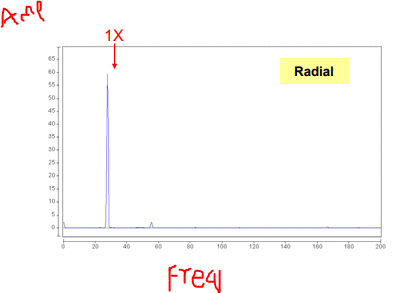

### 1x will explain the following type of unbalances:

**a) STATIC UNBALANCE:** 

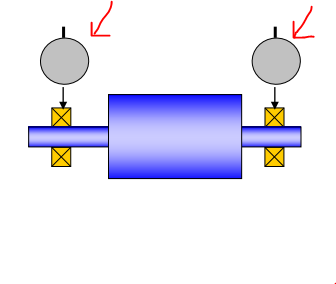

The static unbalance is seen when the machine is not in operation, the rotor will turn so the unbalance mass is at the lowest position.The static unbalance produces a vibration signal at 1X (FUNDAMENTAL FREQUENCY), radial predominant, and in phase signals at both ends of the rotor.

**b) PURE COUPLE UNBALANCE:** 

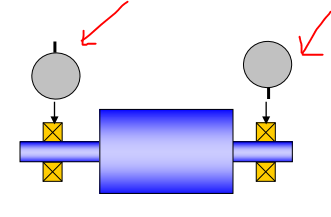

Pure couple unbalance is caused by two identical unbalance masses located at 180° in the transverse area of the shaft. Theoretically, PURE COUPLE UNBALANCE is STATICALLY BALANCED. When rotating pure couple unbalance produces a vibration signal at 1X, radial predominant and in opposite phase signals in both ends of the shaft.

**c) DYNAMIC UNBALANCE:** 

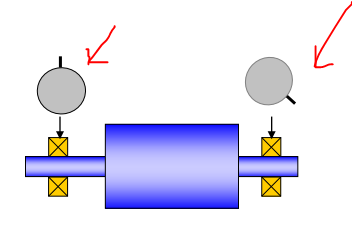

Dynamic unbalance is static and couple unbalance a the same time. In practice, dynamic unbalance is the most common form of unbalance found. When rotating the dynamic unbalance produces a vibration signal at 1X, radial predominant and the phase
will depend on the mass distribution along the axis.

**The relative levels/amplitudes of 1X vibration are dependant upon the location of the unbalance mass.**

A special case of dynamic unbalance can be found in overhung rotors which cause bending moments in shafts. Dynamic unbalance in overhung rotors causes high 1X levels in radial and axial direction due to bending of the shaft. The axial bearing signals in phase may confirm this unbalance.

**Example of an overhung rotor**

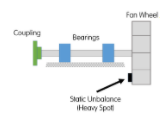

The black spot indicates a heavy spot on the static plane of the rotor, thus indicating a static unbalance for this configuration. Heavy spots can be caused by rotor bow, runout, debris buildup, deterioration, distortion, or even fans throwing balance weights from previous attempts at field balancing. 

### 2X will explain the following faults: 

**MISALIGNMENT:** 

Misalignment is the condition when the geometric centerline of two coupled shafts are not co-linear along the rotation axis of both shafts at operating condition. A 1X and 2X vibration signal predominant in the axial direction is generally the indicator of a misalignment between two coupled shafts.

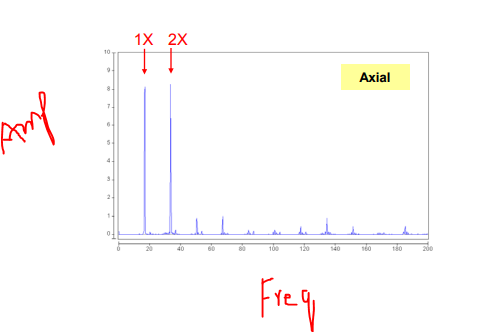

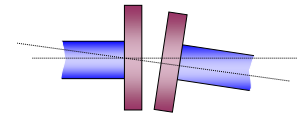

### 3X will eaplain the following faults: 

**a) ANGULAR MISALIGNMENT:** 

Angular misalignment is seen when the shaft centerlines coincide at one point along the projected axis of both shafts. The spectrum shows high axial vibration at 1X plus some 2X and 3X with 180° phase difference across the coupling in the axial direction.These signals may be also visible in the radial direction at a lower amplitude and in phase.

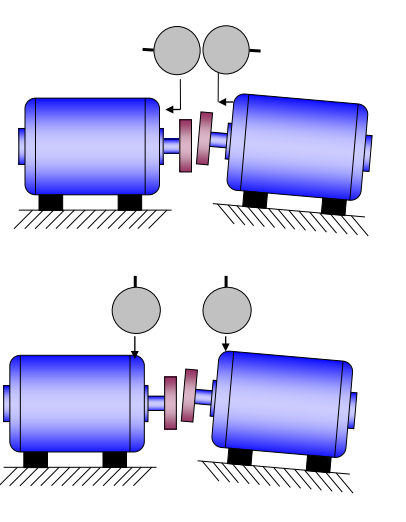

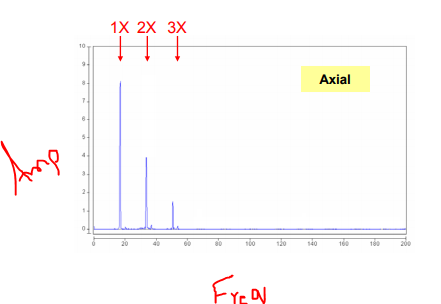

**b) PARALLEL MISALIGNMENT:**

Parallel misalignment is produced when the centerlines are parallel but offset. The spectrum shows high radial vibration at 2X and a lower 1X with 180° phase difference across the coupling in the radial direction. These signals may be also visible in the axial direction in a lower amplitude and 180° phase difference across the coupling in the axial direction.

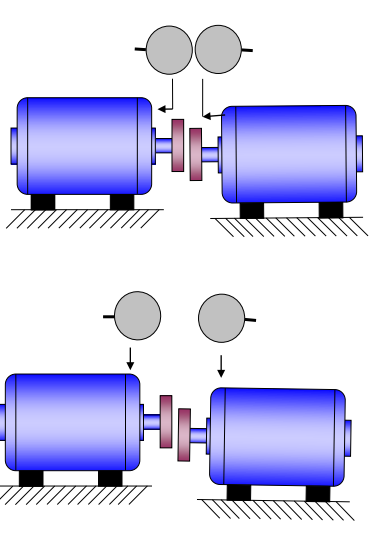

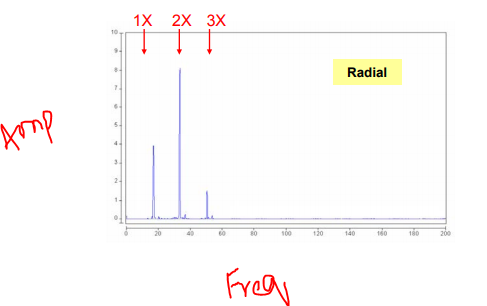

### 1X,2X,3X observations in practice: 

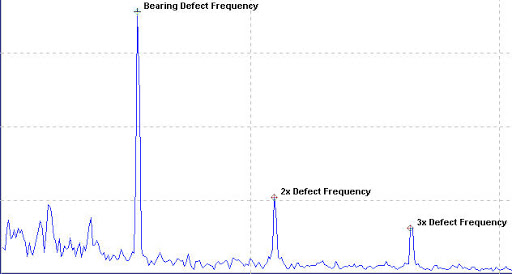

While understanding vibration signatures 1x,2x,3x,etc there is a need for us to get familiarised with the term **"phase"** in vibration. 

## PHASE in vibration: 

- Phase describes the relative timing between two signals/angle difference between a measured point and a reference point.
- Used to locate the imbalance location on a rotor. In machinery vibration analysis, tachometer pulses work as the reference trigger points.The phase measurement in machinery vibration measurements uses the **phase lag convention**. Phase is the angle difference measured from the peak of a vibration signal backward in time to the reference trigger point

**Eg of 0' phase angle:**
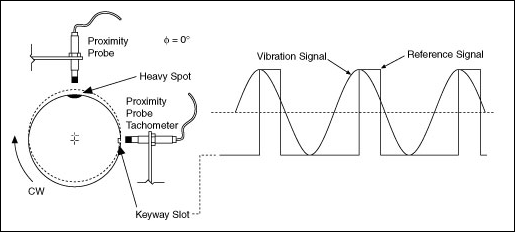

**Eg. of 90' phase shift:**

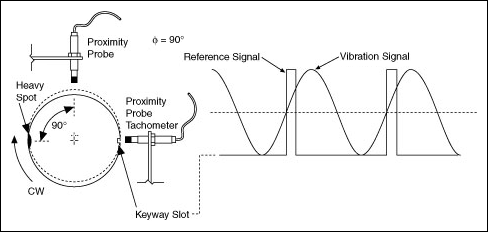

The shaft has a heavy spot and a keyway slot. When the keyway slot passes the proximity probe tachometer, the tachometer detects a trigger pulse. The heavy spot causes the shaft to vibrate as the shaft rotates. When the heavy spot passes the proximity probe, the vibration reaches a peak. The heavy spot passes the proximity probe and the keyway slot passes the tachometer simultaneously. Thus the peak of the vibration does not lag or lead the reference trigger point. At this point, the phase is zero degrees.The peak of the vibration signal lags 90 degrees behind the trigger point. 

When the vibration signal reaches the peak, rotate the shaft backward or counter to the rotation direction until the keyway slot passes the tachometer. 

### PHASE LAG:
The number of degrees you rotate the shaft is the phase lag, or the phase value in machinery vibration measurement.

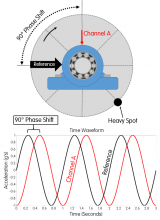

**Eg. of 270' phase shift:**

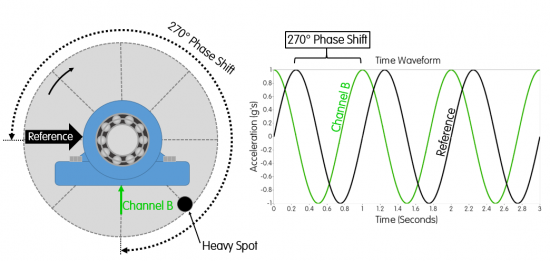

If the sensor is moved from the red Channel A location to the green Channel B location, we would expect a corresponding shift in phase. The next image (below) shows a phase shift of 270° with the green indicator arrow for Channel B on the bottom of the bearing assembly. 

### USES of PHASE in VIBRATION: 

While amplitude may be a general indicator of severity, we need the other components (frequency and phase) to fully understand the problem.

*1) Helps us understand relative motion between machine train components and resolving if dominant forces are rotating or stationary- MULTI CHANNEL PHASE ANALYSIS*

*2) Operating Deflection Shape or ODS. ODS analysis it typically performed by collecting referenced phase data for large numbers of points across a structure or support assembly*

*3) Phase analysis can confirm such maladies as soft foot, unbalance, misalignment, looseness, resonance, bent shafts, cocked bearings, and more.* 

We can also perform simultaneous collection of both horizontal and vertical locations would look like if plotted on the same graph. We see two sine waves that are offset, or shifted from one another. The phase shift between the horizontal and vertical planes is 90° for this orientation.  

### Polar Plots: 

The polar plot of the frequency response of a system is the line traced out as the frequency is changed from 0 to infinity by the tips of the phasors whose lengths represent the magnitude, i.e. amplitude gain, of the system and which are drawn at angles corresponding to their phase ϕ.

Let's take a vibration Vector (oscillations occuring about an equillibrium point) is plotted in the vibration transducer response plane.

- 1x vector is 90 mic pp /220 deg 
- Zero reference is at the transducer angular location
- Phase angle increases opposite to direction of rotation

**Polar plot is typically a plot of vibration amplitude and phase ploted as a function of speed. The vibration is filtered to an order of running speed, usually 1X. This plot is used for balancing.**

This graph sheet consists of concentric circles and radial lines. The concentric circles and the radial lines represent the magnitudes and phase angles respectively. These angles are represented by positive values in anti-clock wise direction. Similarly, we can represent angles with negative values in clockwise direction. For example, the angle 270' in anti-clock wise direction is equal to the angle −90' in clockwise direction.

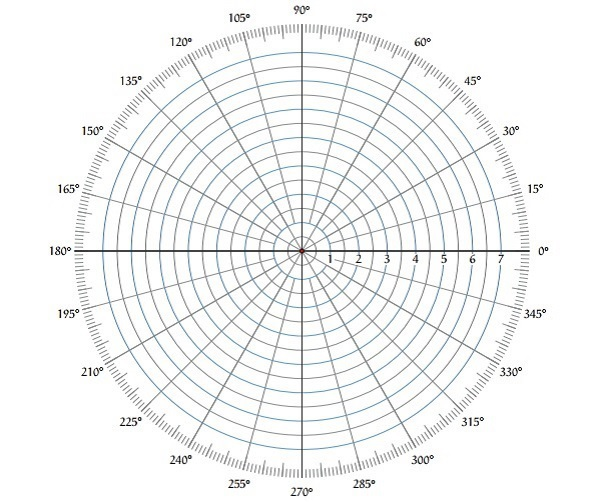

Polar plot is made up of a set of vectors at different speeds.

•           Vector arrow is omitted and the points are connected with a line
•           Zero degree is aligned with transducer location
•           Phase lag increases in direction opposite to rotation
•          1x uncompensated Polar Plot shows location of rotor high spot relative to transducer
•           This is true for 1x circular orbits and approximately true for 1x elliptical orbits
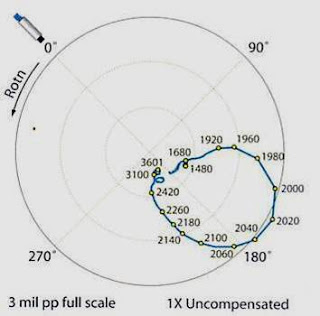

In [81]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import numpy as np

In [82]:
# Declaring what X & Y (initial cartesian plotting shall be converted to polar plots)
xs = np.arange(0, 18, 3) #Substitute x axis
ys = np.arange (5,50,13.5) #Substitute y axis

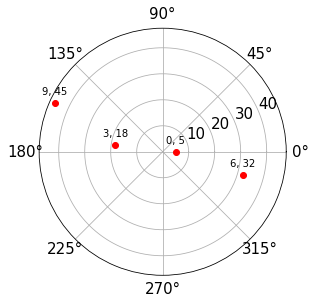

In [83]:
fig = plt.figure(figsize=(5, 10))
ax =plt.subplot(2, 1, 2, projection='polar')

trans_offset = mtransforms.offset_copy(ax.transData, fig=fig,
                                       y=6, units='dots')

for x, y in zip(xs, ys):
    plt.polar(x, y, 'ro')
    plt.text(x, y, '%d, %d' % (int(x), int(y)),
             transform=trans_offset,
             horizontalalignment='center',
             verticalalignment='bottom')

### CENTRELINE PLOTS: 

Shaft centreline plots are constructed from the dc gap volts from a pair of proximity probes mounted at 90 degrees to each other. You can assemble a shaft CL plot using data obtained with a multimeter. 

Shaft centerline shows the location of the journal center, relative to the proximity probes and also how the shaft position changes with speed or time. From the DC component of the vibration signal, the actual shaft location is determined. The average shaft centreline plot is also called XY plot. The factor which determines the clearance boundary for shaft movement within the bearing is diametral clearance. The circle which is drawn on the shaft centreline plot represents the diametral clearance of the nearby bearing or seal. 

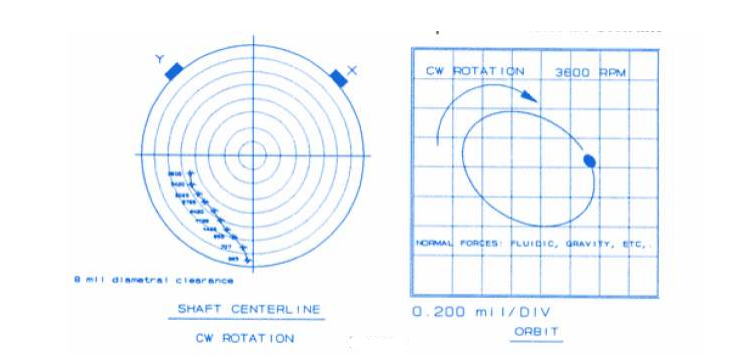

### BODE PLOTS: 
A Bode plot is a linear plot of amplitude and phase vs. shaft rotational speeds. The Bode plot displays the response amplitude and phase at a specified finite element station due to the synchronous excitation (unbalance, shaft bow, disk skew). In the above figure, the amplitude and phase are shown for both the x and y directions. The amplitudes of motion are slightly different due to the effects of asymmetric bearing properties. Thus, the observed critical speeds and vibration amplitude may be different as observed from the x or y probes.

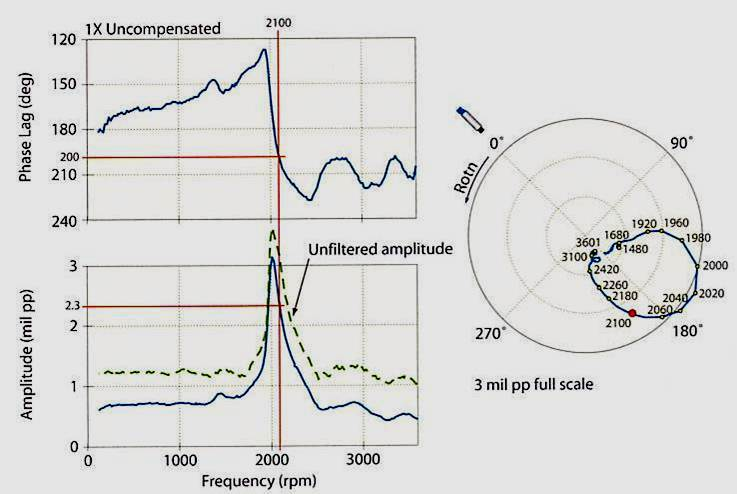


Bode Plot displays the same “vibration vector data” as the Polar Plot. Vibration amplitude and phase are plotted separately on two plots with speed/ferquency on the horizontal axis.

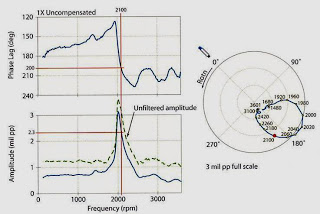


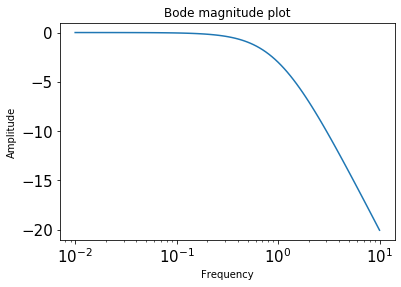

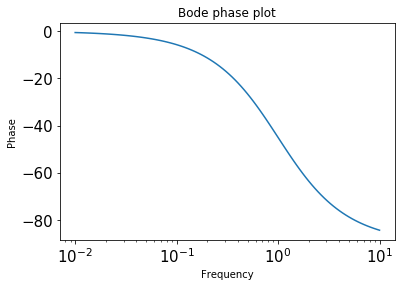

In [84]:
from scipy import signal
import matplotlib.pyplot as plt
sys = signal.TransferFunction([1], [1, 1])
w, mag, phase = signal.bode(sys)
# Bode magnitude plot
plt.figure()
plt.title('Bode magnitude plot')
plt.ylabel('Amplitude')
plt.xlabel('Frequency')
plt.semilogx(w, mag)    
# X= rot speed/freq; Y=amplitude

# Bode phase plot
plt.figure()
plt.title('Bode phase plot')
plt.ylabel('Phase')
plt.xlabel('Frequency')
plt.semilogx(w, phase)  
# X= rot speed/freq; Y=phases (deg)
plt.show()

### CASCADE PLOTS: 

The cascade plot emphasizes the transient behavior more, especially during a startup and coastdown. The primary axes are speed and frequency. Time is not even shown on the plot, and if the machine speed is not changing, the spectra just plot one on top of another at the top of the plot.

A cascade plot consists of series of spectra acquired at consecutive increasing or decreasing speeds. A cascade displays
frequency or order changes versus rotative speed. A series of lines of spectra appear on the cascade plot during change
of speed. By changing the speed of the machine the natural frequencies of rotor systems remains constant. Due to rub in
the machine Harmonics are generated that causes a sudden change in direction of the shaft.

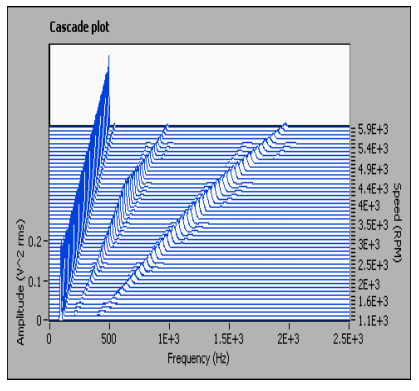

They are slightly different from Waterfall plots. 
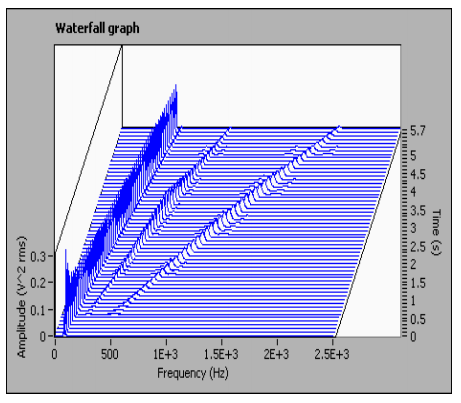
Waterfall plot is a 3 dimensional plot displaying the amplitude of spectral components as a function of both time and
frequency. For each specified time waterfall plot display the frequency spectrum. Waterfall plots are used to study the
machine vibration that changes with time. Waterfall plots are collection of spectra obtained usually during steady state
operating conditions and plotted with respect to time. Waterfall plots also generate half spectra or full spectra.
Spectrum plots are mainly used to identify the frequencies of running speed, sub and super synchronous vibration
frequencies, rolling element bearing defect frequencies, vane and blade pass frequencies etc. 

### METHOD 1 for creating CASCADE PLOTS:

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d import Axes3D

<Figure size 432x288 with 0 Axes>

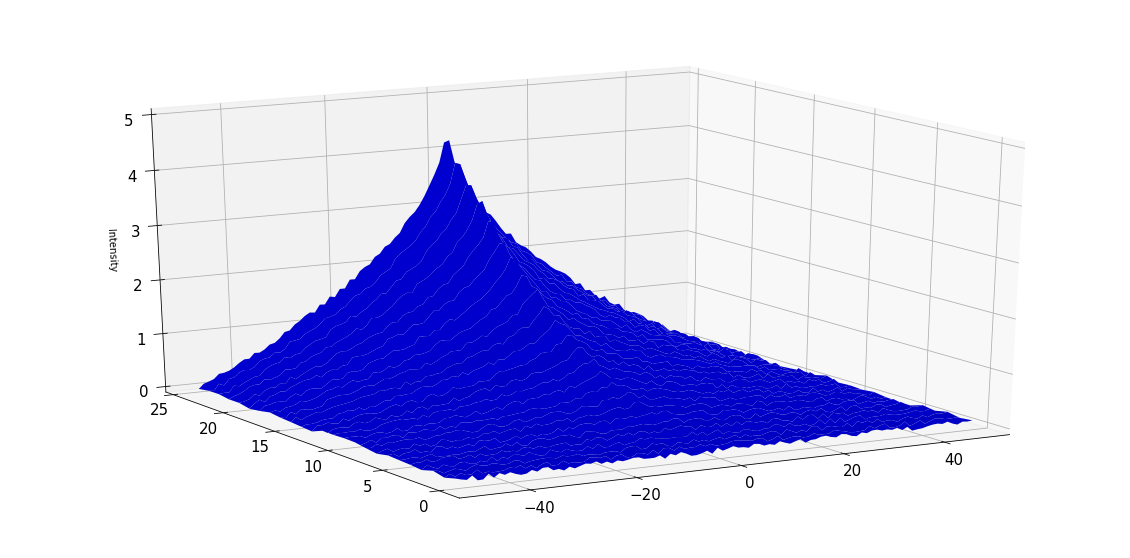

In [86]:
fig = plt.figure()
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-50,50,100)
y = np.arange(25)
X,Y = np.meshgrid(x,y)
Z = np.zeros((len(y),len(x)))

for i in range(len(y)):
    damp = (i/float(len(y)))**2
    Z[i] = 5*damp*(1 - np.sqrt(np.abs(x/50)))
    Z[i] += np.random.uniform(0,.1,len(Z[i]))
    
ax.plot_surface(X, Y, Z, rstride=1, cstride=1000, color='blue', shade=True, lw=0.1)

ax.set_zlim(0, 5)
ax.set_xlim(-51, 51)
ax.set_zlabel("Intensity")
ax.view_init(20,-120)
plt.show()

### METHOD 2 for creating CASCADE PLOT: 

**Use 3D STACK OF 2D LINE PLOTS:**

<Figure size 432x288 with 0 Axes>

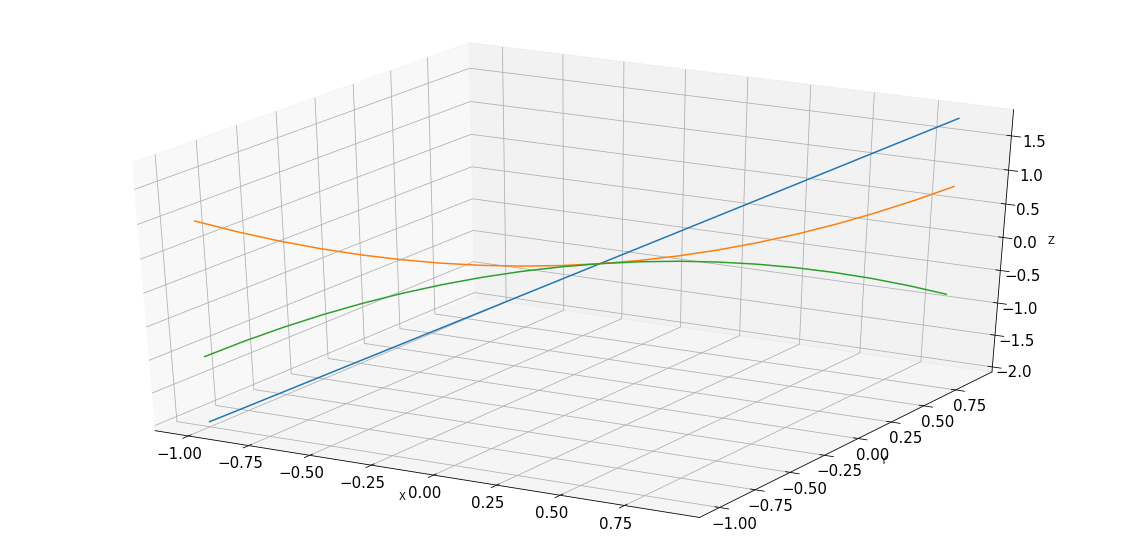

In [87]:
# make 3d axes
fig = plt.figure()
fig = plt.figure(figsize=(20, 10))

ax = fig.gca(projection='3d')

# test data
x = np.arange(-1., 1., .1)
y = np.arange(-1., 1., .1)
z1 = x + y
z2 = x * x
z3 = -y * y

# plot test data
ax.plot(x, y, z1)
ax.plot(x, y, z2)
ax.plot(x, y, z3)

# make labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### CAMPBELL PLOTS:

A Campbell diagram is frequently used to determine the effect of multiple excitation frequencies in high-speed steam turbines. It is an overall or bird's-eye view of regional vibration excitation that can occur on an operating system. The Campbell diagram can be generated from machine design criteria or from machine operating data. Rotational speed is along the X axis & frequency is along the Y axis. 

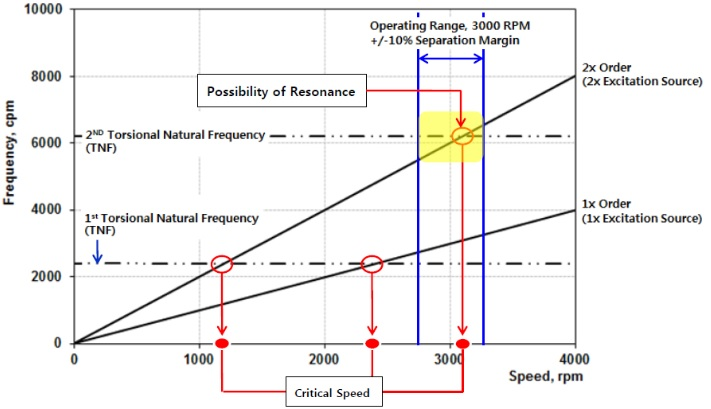

When the Campbell diagram and the mass unbalance responses are concerned, it should be pointed out that: 

- If the rotors are symmetric with low damping, mostly rotors supported by roller bearings, the interpretation concerning the intersection points is not straightforward. 

- If the rotor is not symmetric, as with many rotors because of fluid film bearings, and highly damped, the intersection points do not give any forbidden speed range. 

- If the rotor is not symmetric with 2.5 < Q, the intersection points give forbidden ranges and it is then necessary to determine the mass unbalance responses and check the amplitudes. 
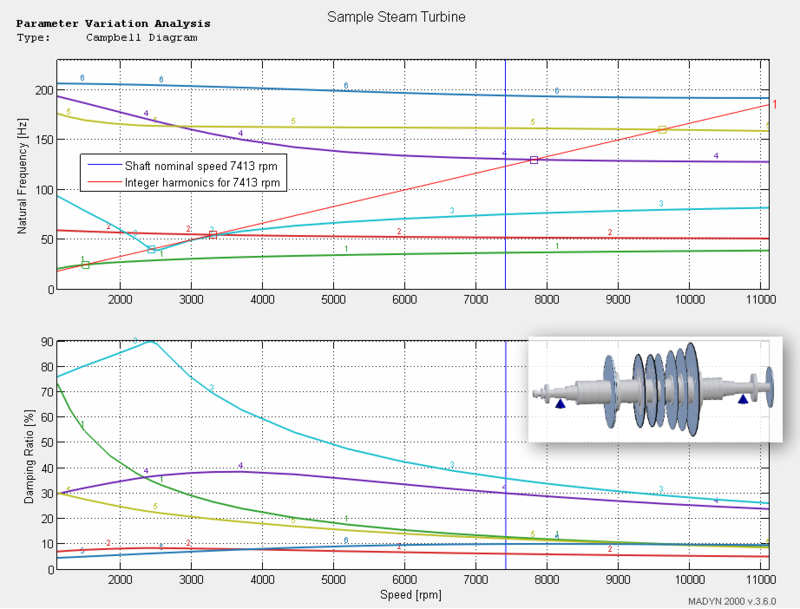

### CRITICAL SPEED & it's relation to RESONANT FREQUENCY: 

In the field of rotordynamics, the critical speed is the theoretical angular velocity that excites the natural frequency of a rotating object, such as a shaft, propeller, leadscrew, or gear, at which a rotating shaft will tend to vibrate violently in the transverse direction if the shaft rotates in horizontal direction. In other words, the whirling or critical speed is the speed at which resonance occurs. Practically, you can see 'a bow' in the rotating shaft. 

As the speed of rotation approaches the object's natural frequency, the object begins to resonate, which dramatically increases system vibration. The resulting resonance occurs regardless of orientation. When the rotational speed is equal to the numerical value of the natural vibration, then that speed is referred to as critical speed a.k.a WHIRLING SPEED.

Turbine shaft material has its own natural frequency, when turbine rotates on such a speed that frequency of shaft become close to its natural frequency, machine causes noise & high vibrations because of resonance due to matching of frequency. A turbine may have more then one critical speed, which may depend upon number of couplings.

Resonance in a mechanical system is a vibration of high amplitude caused by a relatively small stimulus of the same period as the natural vibration period of the system. In other words, it is the vibration that results when any object composed of an elastic material is subjected to its "natural" vibrational frequency. The stimulus that causes this natural vibration can be mechanical or electromagnetic.
One of the stimuli that can cause resonance is rotational motion and changes in rotational motion due to variable speed pumping and the so-called critical speeds that can initiate those resonant frequencies. 

The first critical speed of a pump shaft is linked directly to its static deflection and static deflection depends upon the weight of the rotor, its overhang length and its diameter.

## 1) TIME SERIES MODELING: 
As opposed to considering time as DV and performing multivariate regression models, my philosophy behind considering time series model is simply because of the kind of data being collected at frequent intervals.  

### UNIVARIATE METHODS: 
- ARIMA/ARIMAX/Auto ARIMA

### MULTIVARIATE METHODS: 
- PROPHET 
- VAR(1)

In [88]:
pip install "pystan"

Note: you may need to restart the kernel to use updated packages.


In [89]:
pip install "prophet"

Note: you may need to restart the kernel to use updated packages.


In [109]:
healthy

B1x       B2x       B3x       B4x
2004-02-14 00:02:39  0.060414  0.074308  0.078069  0.044042
2004-02-14 00:12:39  0.059961  0.074678  0.077953  0.043557
2004-02-14 00:22:39  0.060194  0.074982  0.077626  0.044558
2004-02-14 00:32:39  0.061524  0.075551  0.077331  0.043913
2004-02-14 00:42:39  0.061169  0.075460  0.078992  0.044504
...                       ...       ...       ...       ...
2004-02-15 23:12:39  0.062485  0.074162  0.076728  0.043699
2004-02-15 23:22:39  0.061560  0.074548  0.076465  0.044014
2004-02-15 23:32:39  0.061186  0.074021  0.076368  0.043787
2004-02-15 23:42:39  0.061323  0.073325  0.079326  0.043319
2004-02-15 23:52:39  0.064163  0.074462  0.077924  0.044518

[288 rows x 4 columns]

In [110]:
# Creating training dataframe
prophet_healthy_train = pd.DataFrame()
prophet_healthy_train['ds'] = healthy.index
prophet_healthy_train['y'] = list(healthy['B1x'])
#B1x becomes a series, thus while assigning to 'y', convert it into a list and then use

prophet_healthy_train.head()

ds         y
0 2004-02-14 00:02:39  0.060414
1 2004-02-14 00:12:39  0.059961
2 2004-02-14 00:22:39  0.060194
3 2004-02-14 00:32:39  0.061524
4 2004-02-14 00:42:39  0.061169

In [102]:
healthy.B1x

2004-02-14 00:02:39    0.060414
2004-02-14 00:12:39    0.059961
2004-02-14 00:22:39    0.060194
2004-02-14 00:32:39    0.061524
2004-02-14 00:42:39    0.061169
                         ...   
2004-02-15 23:12:39    0.062485
2004-02-15 23:22:39    0.061560
2004-02-15 23:32:39    0.061186
2004-02-15 23:42:39    0.061323
2004-02-15 23:52:39    0.064163
Name: B1x, Length: 288, dtype: float64

How does prophet work?
https://medium.com/analytics-vidhya/how-does-prophet-work-44addaab6148

HBR basics of forecasting:
https://hbr.org/1971/07/how-to-choose-the-right-forecasting-technique

In [104]:
from statsmodels.graphics.tsaplots import plot_acf 

In [114]:
prophet_healthy_train.index=prophet_healthy_train.ds

In [119]:
prophet_healthy_train.drop(prophet_healthy_train.columns[0], axis=1)

y
ds                           
2004-02-14 00:02:39  0.060414
2004-02-14 00:12:39  0.059961
2004-02-14 00:22:39  0.060194
2004-02-14 00:32:39  0.061524
2004-02-14 00:42:39  0.061169
...                       ...
2004-02-15 23:12:39  0.062485
2004-02-15 23:22:39  0.061560
2004-02-15 23:32:39  0.061186
2004-02-15 23:42:39  0.061323
2004-02-15 23:52:39  0.064163

[288 rows x 1 columns]

### VISUALISING HEALTHY DATA

<IPython.core.display.Javascript object>


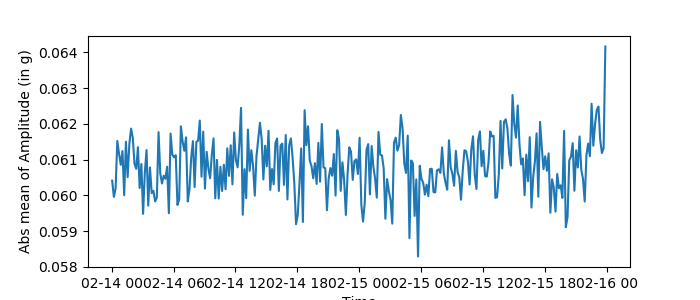

Text(0.5, 0, 'Time')

In [194]:
%matplotlib notebook  
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.figure(figsize=(7,3))
plt.plot(prophet_healthy_train.index, prophet_healthy_train.y, label = "Healthy data")
plt.ylabel('Abs mean of Amplitude (in g)')
plt.xlabel('Time')

In [203]:
np.polyfit(list(prophet_healthy_train.index), list(prophet_healthy_train.y), 1) 

TypeError: unsupported operand type(s) for +: 'Timestamp' and 'float'

In [216]:
from datetime import datetime

In [220]:
def trenddetector(index,data,order):
    index=datetime(index)
    data=float(data)
    result = np.polyfit(list(index),list(data), order)
    slope = result[-2]
    return float(slope)

In [221]:
trenddetector(prophet_healthy_train.index,prophet_healthy_train.y, 1)

TypeError: an integer is required (got type DatetimeIndex)

In [173]:
prophet_healthy_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 288 entries, 2004-02-14 00:02:39 to 2004-02-15 23:52:39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      288 non-null    datetime64[ns]
 1   y       288 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.8 KB


In [175]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [177]:
decomposition=seasonal_decompose(prophet_healthy_train.y, model="additive", period=5)

In [180]:
# creating shorter variables
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

<IPython.core.display.Javascript object>


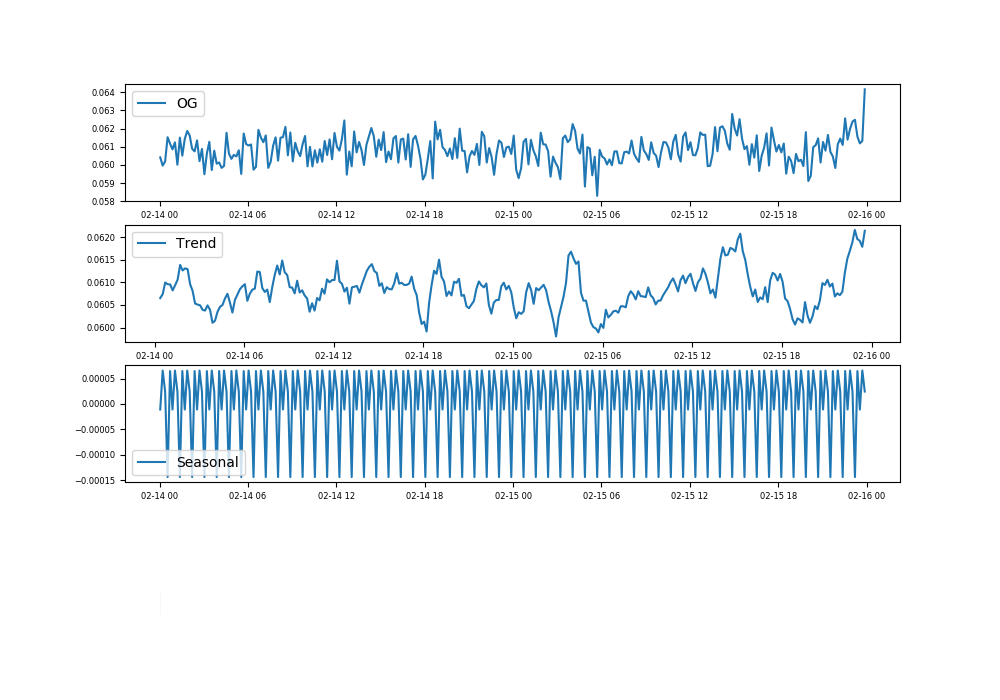

In [222]:
%matplotlib notebook  
# Decomposed plot
plt.figure(figsize=(10,7))
plt.rc('xtick',labelsize=6)
plt.rc('ytick',labelsize=6)
plt.subplot(411)
plt.plot(prophet_healthy_train.y, label="OG")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label="Seasonal")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label="Residual")
plt.legend(loc='best')

### ADF test

In [238]:
from statsmodels.tsa.stattools import adfuller

In [239]:
adfuller(prophet_healthy_train.y)

(-5.9925431224246655,
 1.7318589296937341e-07,
 3,
 284,
 {'1%': -3.4535872903895797,
  '5%': -2.871771355211212,
  '10%': -2.5722217283277127},
 -3106.5108631719568)

### KPSS test

In [240]:
from statsmodels.tsa.stattools import kpss

In [241]:
kpss(prophet_healthy_train.y)
#The KPSS value is 0.18 which indicates that the series is stationary. 

D:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.18223415619755728,
 0.1,
 16,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

**KPSS TEST OUTPUT INTERPRETATION**

KPSS Level = 0.18223415619755728

Truncation lag parameter = 16

p-value = 0.1

In [242]:
# METHOD 2
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

In [243]:
kpss_test(prophet_healthy_train.y)

KPSS Statistic: 0.18223415619755728
p-value: 0.1
num lags: 16
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


D:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### ACF

In [256]:
#ACF function in R and ACF plot for finding q coordinate in "MA" part of ARIMA
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

<IPython.core.display.Javascript object>


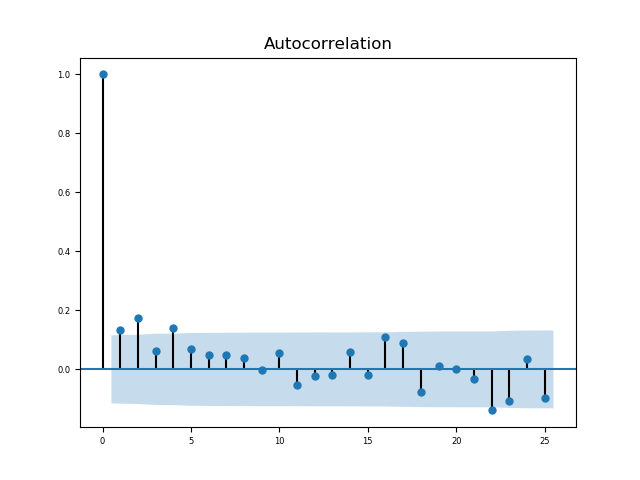

In [261]:
ACF=plot_acf(prophet_healthy_train.y, ax=plt.gca())
# q value is 2

### PACF

In [250]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

<IPython.core.display.Javascript object>


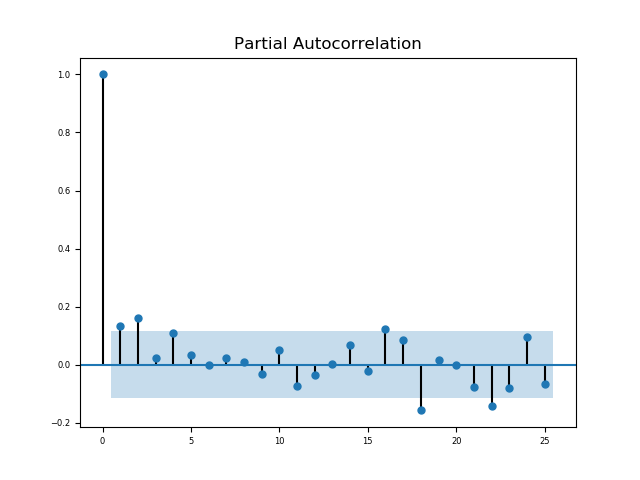

In [262]:
%matplotlib notebook
PACF=plot_pacf(prophet_healthy_train.y, ax=plt.gca())
#p value is 2

In [263]:
from sklearn.decomposition import PCA

In [ ]:
# tSNE and PCA for dimension reduction- to arrive at health indicator


# ruptures for change point detection
# Bayesian change point detection algorithms
# dbscan for outlier detection
# Twitter's breakout & anomaly detection algorithms (anomaly.io) 


# avocado dataset
# toy dataset

### Change points

Signals collected from industries are processed and as a task in signal processing, those data points which deviate from regular course (abnormal behaviour, outlier, etc) are labelled as Changepoints. 

Eg. Study of gait characteristics

Signal processing (wrt Time series data) is common in Econometrics and is often used in Quality control, Speech processsing, financial analyses, bio-infomatics, climatology, process control, EEG analysis, DNA segmentation, econometrics, and disease demographics,etc

Typically, when any activity is monitored by sensors against time, it tends to generate univariate or multivariate time series data; the changepoints analysis can correspond to the following types:

- a) **ONLINE**: detects changes in real time a.k.a **EVENT/ANOMALY DETECTION**
- b) **OFFLINE**: retrospective detection with high accuracy a.k.a **SIGNAL SEGMENTATION**




In [264]:
pip install "pystan"

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1076)'))) - skipping
Note: you may need to restart the kernel to use updated packages.


In [266]:
pip install "fbprophet"

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Running setup.py clean for fbprophet
Failed to build fbprophet
    Running setup.py install for fbprophet: started
    Running setup.py install for fbprophet: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'D:\Anaconda\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\rsh\\AppData\\Local\\Temp\\pip-install-qatfhk8g\\fbprophet\\setup.py'"'"'; __file__='"'"'C:\\Users\\rsh\\AppData\\Local\\Temp\\pip-install-qatfhk8g\\fbprophet\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\rsh\AppData\Local\Temp\pip-wheel-xzb8rxdj'
       cwd: C:\Users\rsh\AppData\Local\Temp\pip-install-qatfhk8g\fbprophet\
  Complete output (11 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  Importing plotly failed. Interactive plots will not work.
  INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f5236004a3fd5b8429270d00efcc0cf9 NOW.
  error: M

In [267]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
m = Prophet()
m.fit(df)